<a href="https://colab.research.google.com/github/Luciahelenasantos/PUC-SPRINT-III/blob/main/MVP_SPRINTIII_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Sprint III - PUC Rio

## Aluna : Lucia Helena Barros dos Santos

# **Descrição do Problema:**

Estudos sobre poluentes atmosféricos são cada vez mais necessários a partir de agora, profundas mudanças climáticas estão sendo observadas e apresentando uma tendência de crescimento e agravamento de fenômenos climáticos, assim tais estudos tornam-se cruciais e afetando de forma direta várias questões que afetam o cotidiano da população mundial.
Vários são os assuntos relevantes quando se refere à estudos de poluentes:

•	O impacto na saúde humana dado que a poluição do ar está diretamente relacionada a uma série de problemas de saúde, incluindo doenças respiratórias, cardiovasculares e câncer.

•	A preservação do meio ambiente, pois poluentes atmosféricos podem causar danos ao meio ambiente, incluindo a acidificação de corpos d'água, danos a ecossistemas terrestres e aquáticos, e a destruição da camada de ozônio (O3).

•	O combate às mudanças climáticas, onde estudos sobre poluentes atmosféricos podem auxiliar na promoção de desenvolvimento sustentável.

•	A conformidade regulatória, é de conhecimento que muitos países têm regulamentações estritas relacionadas à qualidade do ar e limites de emissões de poluentes.

•	No desenvolvimento de tecnologias limpas, onde a pesquisa sobre poluentes atmosféricos impulsiona o desenvolvimento de tecnologias mais limpas e eficientes, tanto na indústria quanto no transporte, contribuindo para a redução das emissões dos mesmos.

•	A Sensibilização Pública, os estudos sobre poluentes atmosféricos aumentam a conscientização pública sobre a importância da qualidade do ar e da redução da poluição, incentivando ações individuais e coletivas, visando proteger o meio ambiente.

•	A tomada de Decisão Política, dados e conclusões de estudos sobre poluentes atmosféricos são essenciais para a formulação de políticas públicas eficazes relacionadas ao meio ambiente e à saúde.

Alguns parâmetros foram estabelecidos como Padrões da Qualidade do Ar no Estado de São Paulo de acordo com o *Decreto Estadual nº 59.113, de 23/04/2013 (SÃO PAULO, 2013)*, no qual são observados os seguintes critérios:

$I. Metas$ $Intermediárias$ - (MI) estabelecidas como valores temporários a serem cumpridos em etapas, visando à melhoria gradativa da qualidade do ar no Estado de São Paulo, baseada na busca pela redução das emissões de fontes fixas e móveis, em linha com os princípios do desenvolvimento sustentável;

$II. Padrões$ $Finais$ (PF) - Padrões determinados pelo melhor conhecimento científico para que a saúde da população seja preservada ao máximo em relação aos danos causados pela poluição atmosférica.

A Tabela a seguir apresenta os padrões de qualidade do ar estabelecidos no Decreto Estadual citado anteriormente, sendo que os padrões vigentes estão assinalados em vermelho.



<font size="3" color="">**Tabela 2 – Padrões Estaduais de Qualidade do Ar<br>
(Decreto Estadual nº 59.113 de 23/04/2013)**</font>

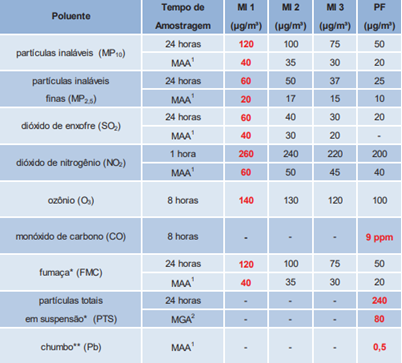

<font size="1" color="#ADD8E6">Fonte: CETESB (2020) adaptado do Decreto Estadual nº 59.113/2013 (SÃO PAULO, 2013)</font>


<font size="2">Nota 1:<br>
1 - Média aritmética anual.<br>
2 - Média geométrica anual.<br>
* Fumaça e Partículas Totais em Suspensão - parâmetros auxiliares a serem<br> utilizados apenas em situações específicas, a critério da CETESB.<br>
* Chumbo - a ser monitorado apenas em áreas específicas, a critério da CETESB.<br>
Nota 2: Padrões estaduais vigentes em vermelho.<br>
Nota 3: Padrões Nacionais (BRASIL, 2018) = Padrões Estaduais (SÃO PAULO, 2013),<br>exceto para o padrão de curto prazo para SO2 Padrão nacional de curto prazo<br> para SO2 (BRASIL, 2018): PI1=125 µg/m3, PI2=50 µg/m3, PI3=30 µg/m3 e PF=20 µg/m3</font>

# **Objetivos**


#####1 - Analisar o comportamento dos poluentes ao longo do período em qestão, considerando níveis temporais como o ano, a estação meteorológica do ano e os períodos do dia;

#####2 - Analisar o comportamento dos poluentes a nível territorial, pelas localidades das estações meteorológicas, verificando o poluente se aprsentou de forma mais significativa;

#####3 - Identificar se em algum momento do perído analisado, a medição de algum dos poluentes avaliados no estudo, superou o limite máximo considerado aceitável na avaliação da qualidade do ar, na tentativa de localizar no território e no tempo, a ocorrência de comportamentos atípicos;

#####4 - Verificar a tendência e a sazonalidade do comportamento do poluente ao longo do período do estudo.




#**1 - Banco de dados**

Em virtude de tantos itens relevantes na proteção do meio ambiente e da saúde da população, o monitoramento da qualidade do ar passou a ter papel fundamental nos dias atuais e com perspectivas de crescimento e aprofundamento em estudos no futuro, assim tal fato sugeriu a análise do banco de dados encontrado na plataforma $kaggle$, relativo à medições de 87 estações meteorológicas distribuídas em localidades do Estado de São Paulo realizadas no período de 2015 a 2021, pelo Instituto de Energia e Meio Ambiente (IEMA).


Considerando dar continuidade no estudo dos poluentes atmosféricos, para a implementação deste trabalho foi proposto envolver conceitos e ferramentas de banco de dados, com ênfase em grandes volumes de dados ou **Big Data** como denominado, assim a partir de uma busca na plataforma *kaggle*, referente ao tema poluentes atmosféricos, foi encontrada a base de dados com características próximas de atender à proposta do trabalho.




Sendo alguns poluentes atmosféricos considerados de grande importância no que tange ao monitoramento da qualidade do ar, as medições presentes no banco de dados referem-se a um conjunto de 9 poluentes atmosféricos, cuja unidade de medida é o “microgramas por metro cúbico” (µg/m³), são eles:


*   **SO2:** Dióxido de Enxofre
*   **CO:** Monóxido de Carbono
*   **NO:** Monóxido de Nitrogênio
*   **NO2:** Dióxido de Nitrogênio
*   **O3:** Ozônio
*   **MP10:** Material Particulado 10
*   **MP2.5:** Material Particulado 2.5
*   **PTS:** Partículas Totais em Suspensão 2
*   **FMC:** Fumaça








Dados extraídos do site da plataforma $Kaggle$:

https://www.kaggle.com/datasets/samirnunesdasilva/sao-paulo-pollution-data?select=SP_poluicao_dados.csv



O banco de dados utilizado originário da plataforma kaggle, apresenta estrutura contendo uma única tabela, seguindo modelo de estrutura ‘flat’, caracterizada pela presença de colunas, onde tem-se uma coluna para cada informação, sem a presença de tabelas distribuídas de forma hierárquica.


A característica estrutural do banco se dá pela presença de colunas, sendo uma para cada informação, então pertinentes de serem consideradas como dimensões.

Desta forma o banco resulta em uma tabela **Fato** com as medidas dos Poluentes em determinada data e hora do dia, tendo como chave primária - ‘Primary Key’ (PK) o atributo ID, e as outras colunas como sendo  seguintes Dimensões e suas respectivas chaves estrangeiras – ‘Foreing Key’ (FK) :
* Código de Identificação do Poluente - Dimensão Poluente,
* Estação Meteorológica - Dimensão Estação Meteorológica
* Data e horário da medição - Dimensão Tempo.

Uma característica que aproxima o banco de um **Big Data** date consiste no volume de 10.980.514 (dez milhões novecentos e oitenta mil e quinhentos e quatorze) registros, porém, ressaltando que um banco não deve ser considerado tal, apenas pelo volume de informações encontrada no mesmo, pois outras questões devem ser levadas em consideração para tal afirmação.

### **1.1 - Catálogo de dados**




Na figura abaixo representando o catálogo, foram considerados os atributos originais e os atributos derivados, criados na etapa de processo de "Extração, Transformação e Carga" (ETL), o qual será discutido com maior especificidade no item sobre a plataforma AZURE. Os atributos derivados possuem relevância na etapa de construção das análises.

### **1.1 - Catálogo de dados**

#### 1.1.1 - Modelagem do Banco de Dados

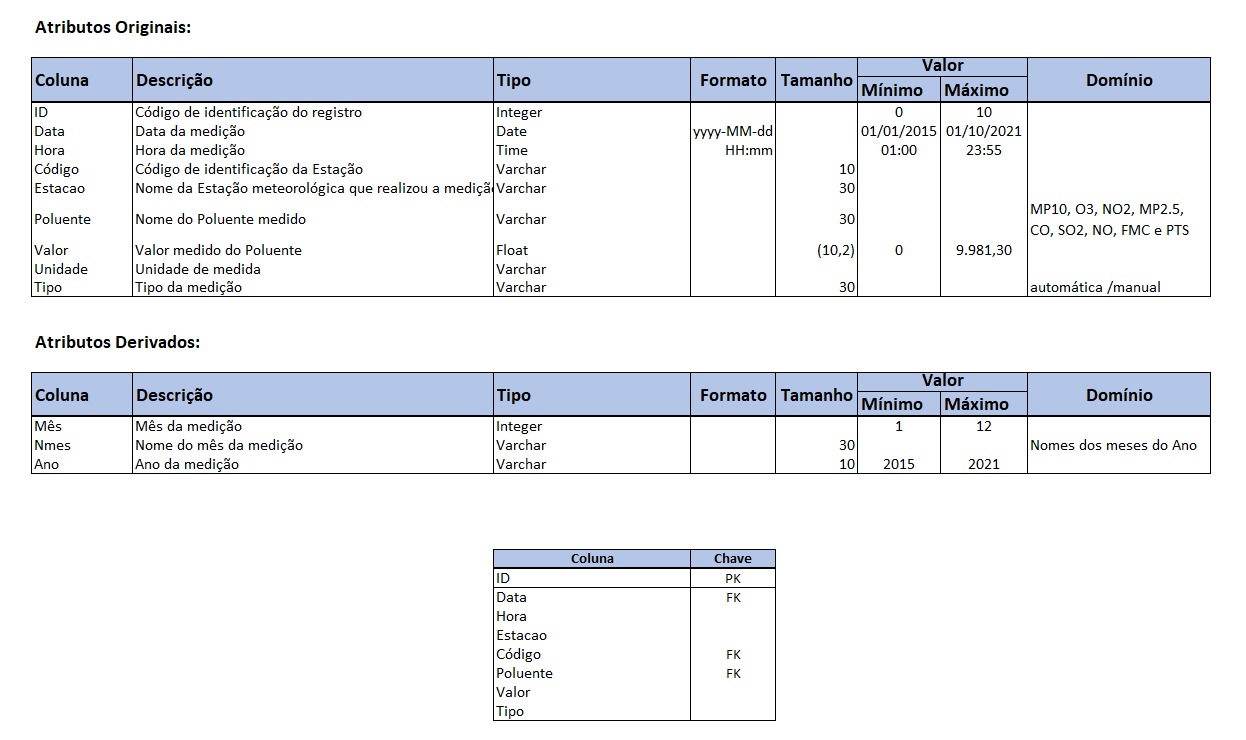

#### 1.1.2 - Dicionário de dados

##### - **ID:** Código que identifica a medida realizada;
##### - **Data:** Representa a data quando foi feita a medição, esta no formato 'yyyy-MM' (Ano-Mês) foi a origem das variáveis derivadas Ano, Mes e nmes;
##### - **Hora:** Representa o horário da medição, no formato 'HH:mm' (Hora-Minuto), importante observar que as os segundos;

> **OBS1.: A concatenação entre os atributos Data e Hora, formariam uma chave composta, caso fosse de interesse avaliar o comportamento do poluente em uma Hora de detreminado Dia.**


> **OBS1.: A criação das variáveis derivadas é descrita no bloco 2 onde é detalhado o uso das ferramentas de transformação de dados na plataforma AZURE**






##### - **Código:** Representa o código de Identificação da Estação Meterológica, cuja lei de formação consiste da sigla do estado, no caso, SP - São Paulo e um número sequencial;

##### - **Estacao:** Nome da Estação Meteorológica;

##### - **Poluente:** Sigla que representa o poluente em questão;

##### - **Valor:** Valor medido da concentração do poluente;

##### - **Unidade:** Unidade de medida do poluente em Micrograma por Metro Cúbico (µg/m3);

##### - **Tipo:** Informação sobre como foi realizada a medição se de forma manual ou automática;
---


#**2 - Uso dos dados na plataforma AZURE - Microsoft**

Um papel importante que foi compreendido na construção do trabalho se refere à significativa relevância da engenharia de dados em relação ao Big Data, uma vez que o Big Data envolve lidar com conjuntos de dados extremamente grandes, complexos e variados, a engenharia de dados passa a desempenhar um papel crucial para garantir que os dados sejam coletados, processados e transformados de maneira eficiente e eficaz em informações úteis.


Foi então realizado o exercício do uso de uma das plataformas que possui ferramentas para manuseio de grandes bancos de informações, no caso, se tratou da plataforma denominada AZURE da empresa Microsoft, onde se itencionou implementar um repositório de armazenamento do banco da dados.


Inicialmente a intenção do proceso de construção do repositório denominado **Data Lake**, foi através do aprendizado de seu uso, conhecer o conjunto de ferramentas em sua composição e as etapas deste processo, descritas a seguir.

### **2.1 - Criação da Conta de Armazenamento na Plataforma**

Várias foram as etapas necessárias para a inscrição no ambiente cloud da Azure, porém, a primeira ação a ser implementada consistiu na criação de uma conta de armazenamento denominada “contarmazmvp3”, conta esta oferecida gratuitamente pela AZURE.


Outra informação importante na criação da conta é com relação à região selecionada, no caso, ”Eaest US” referindo-se à Região Leste dos Estados Unidos da América, sendo a região padrão apresentada, tal região corresponde à localidade no mundo onde existe um DATACENTER da AZURE e consequentemente onde a conta de armazenamento será provisionada, esta escolha apresenta implicações significativas para o desempenho, a disponibilidade e os custos de armazenamento. Nesta etapa de criação da conta de armazenamento é quando se inicia a implementação do Data Lake, selecionando-se a opção “Habilitar namespace hierárquico”. Complementando em relação à região esta deve ser a mesma a ser selecionada para todos dos outros serviços que solicitarem Região.

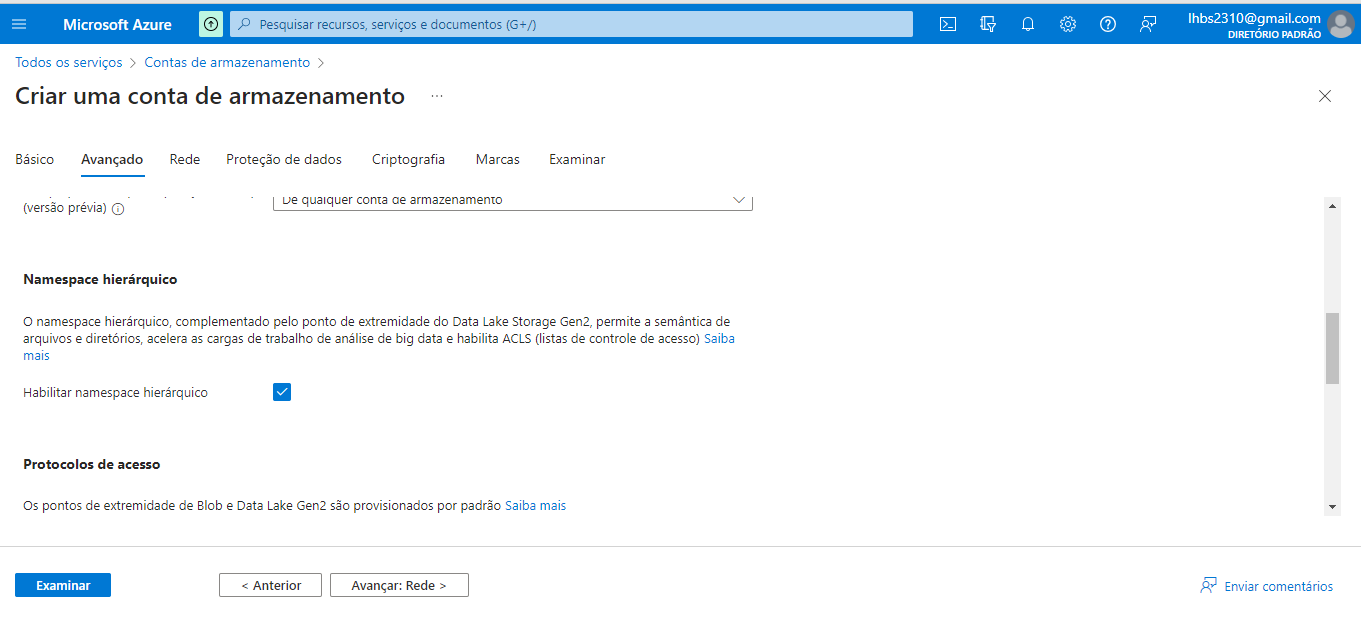

A importante providência inicial, considerando a falta de experiência no uso de serviços em nuvem, foi criar alertas para controle do uso e pagamento dos mesmos, pois cada serviço utilizado representa um consumo destes créditos, tendo tal ação sido primordial no acompanhamento dos consumos, uma vez que para a abertura da conta foi utilizado um cartão de crédito.


Foi então dentro da conta de armazenamento criado um BUDGET denominado **“controleMVPIII”** que consiste em um orçamento onde através deste são estabelecidos valores que pretende-se pagar pelos serviços como também sinais de alerta para não ultrapassar tais valores no uso atual e nos usos previstos. Na imagem abaixo é verificado o valor de 200 dólares correspondendo a 986,00 reais disponível para uso na conta gratuita.


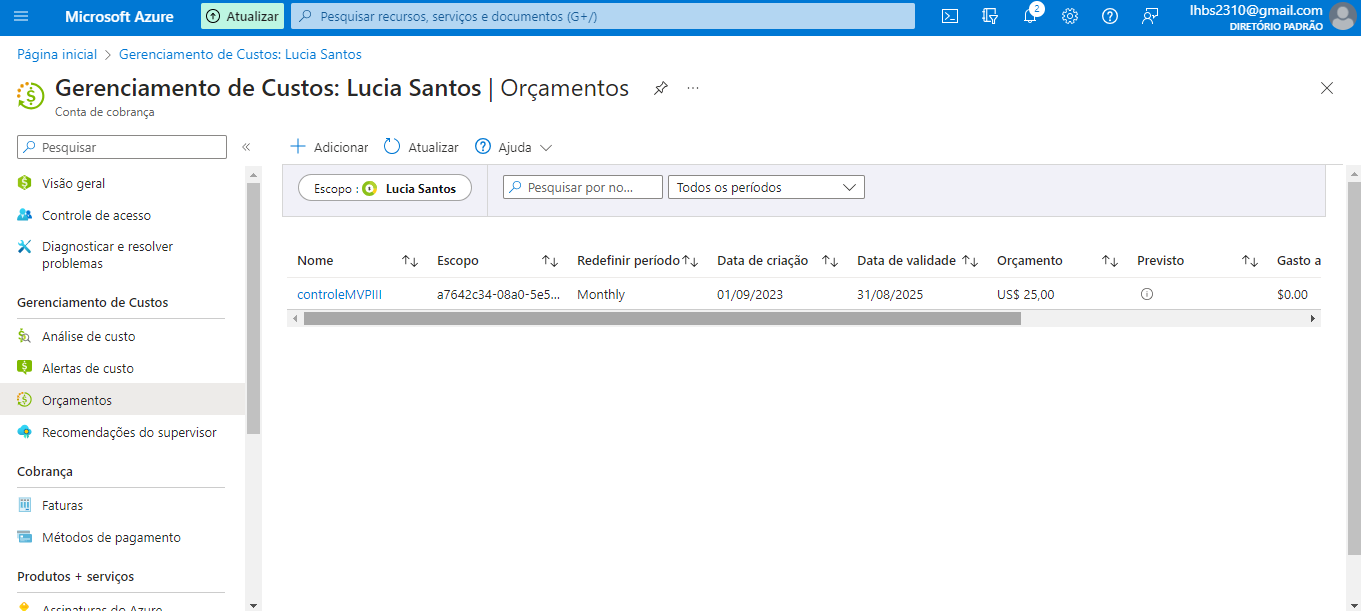

### **2.2 - Criação do Servidor e do Banco de dados SQL**

A seguir foi criado um servidor de banco de dados SQL, denominado **'serveradminluciamvped'**, e com o servidor SQL criado foi possível criar o banco de dados SQL (BD_SQL) denominado **'mysqldbluciamvped'** através do serviço baseado na estrutura de banco de dados Microsoft SQL Server.

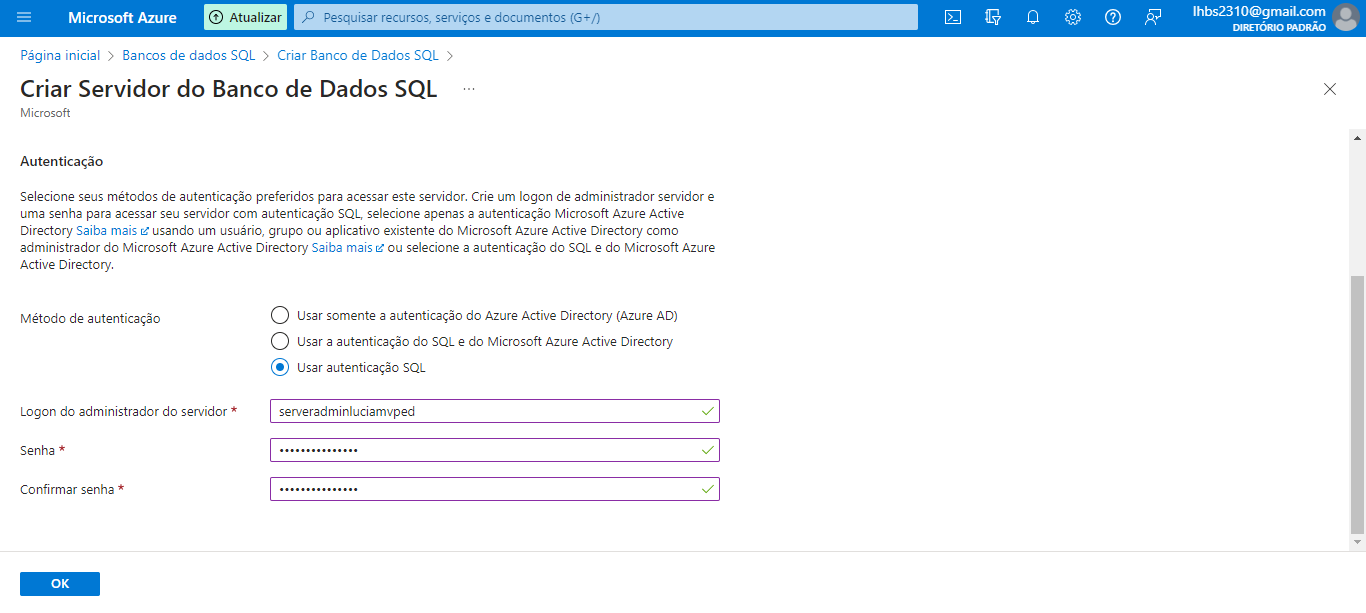

Em seguida com o servidor criado, é possível no momento de criação do (BD_SQL), dimensionar o tamanho em giga bytes (GB) do BD, o qual se deseja criar, além de seu custo de uso estimado.

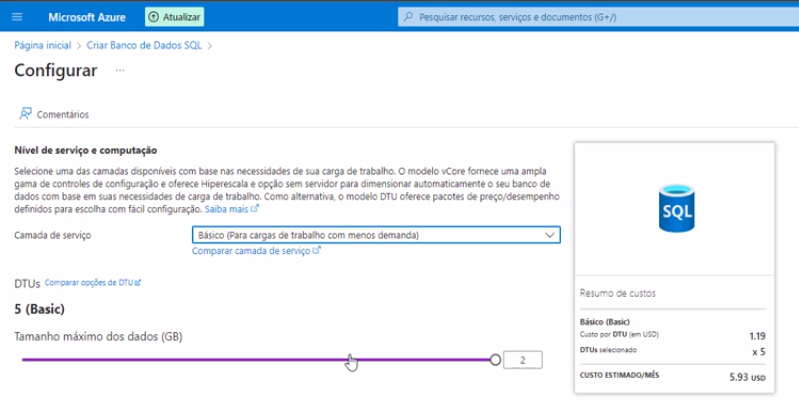

Ainda na configuração do BD_SQL, é necessário inserir uma regra para o acesso do firewall, isso é feito quando é colocado o IP da máquina DESKTOP através da qual foi realizada a criação do espaço de armazenamento na nuvem, vide seta na imagem a seguir. Por motivo de segurança na imagem as informações sobre IP foram pintadas na cor preta, deixando apenas o ‘Nome da regra’ visível.

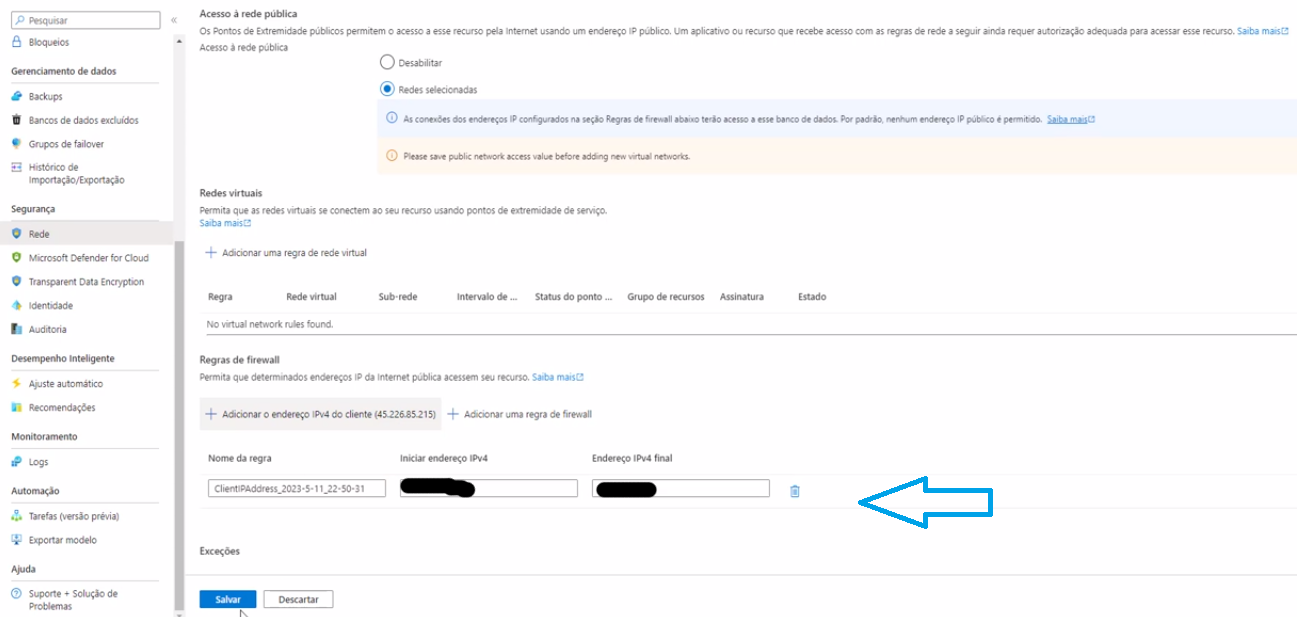

### **2.3 - Etapa de Transformação e Carga dos dados**

Após a criação do banco de dados, foi acessada na plataforma a opção de UPLOAD de dados, permitindo carregar o arquivo em formato CSV, com as informações descritas anteriormente na seção de Banco de Dados. Importante observarmos que sendo a tabela carregada desta forma, ou seja, sem que fosse feito um esquema com instruções SQL, descrevendo os atributos e suas características como nome e tipo, todos os atributos foram carregados com as informações no formato tipo Character, exceto o atributo Valor, que correspondendo à medida do Poluente lida pela estação, foi reconhecido como valor numérico do tipo Float.


O próximo passo realizado ocorreu na necessidade de criação do pipeline, ou seja, uma sequência automatizada de atividades e transformações de dados que permitem a ingestão, transformação e movimentação de dados de uma ou mais fontes para um ou mais destinos, sendo os pipeline's fundamentais para a engenharia de dados e a integração de dados em ambientes de nuvem. Antes de criarmos os pipelines foi criada a instância “factorymvped” na ferramenta do AZURE denominada Data Factory (DF).

Acessaremos os recursos do Data Factory através do aplicativo “Estúdio do Azure Data Factory”.

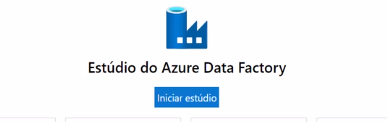

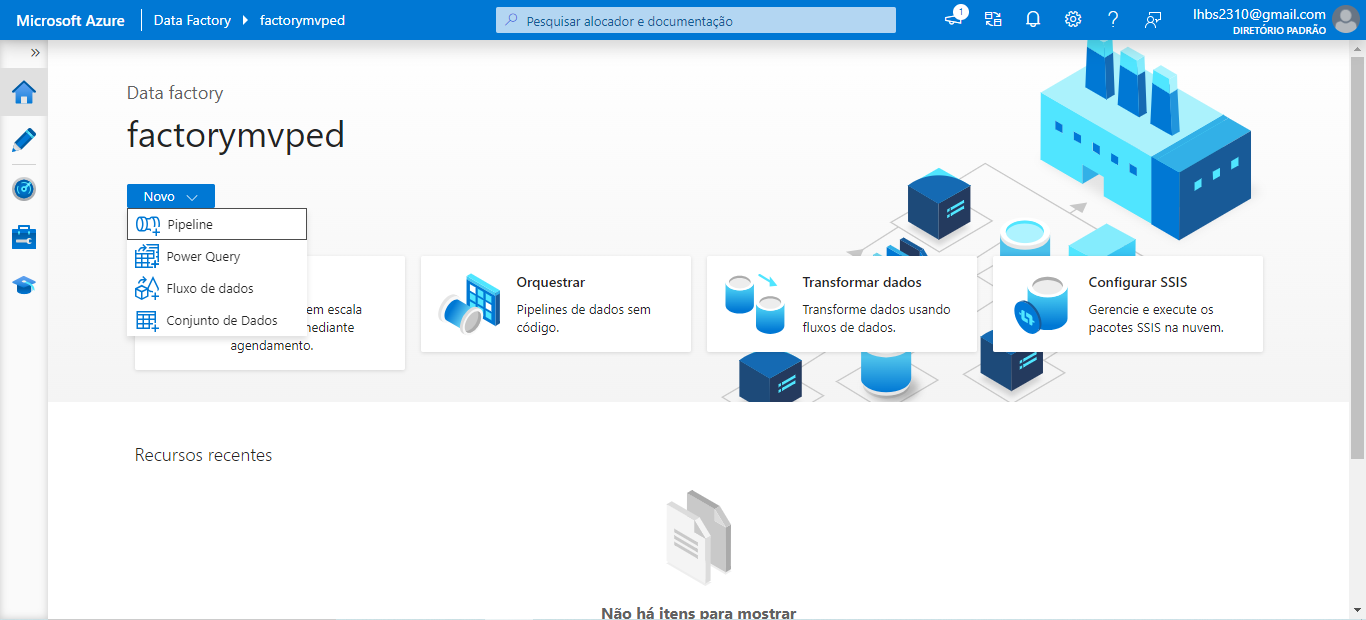

#### 2.3.1 - Processos de ETL de Transformação e Carga realizados utilizando os Recursos do Data Factory

 Após criada a instância “factorymvped” no serviço DF, no mesmo foram utilizados recursos como o Conjunto de Dados, o Pipeline e o Fluxo de Dados, sobre os quais seguir serão descritas as ações realizadas em cada um dos recursos separadamente.

1. Pipeline – Foi criado o Pipeline denominado “Pipeline1”, onde cada ação a ser realizada no Pipeline é considerada como uma atividade, assim no nosso caso foram realizadas três atividades:

*   1ª Atividade - No Conjunto de Dados foi feita uma cópia da tabela denominada “AzureSqltable1”, afim de se preservar a tabela original “Qualidade_AR_SP”;

*   2ª Atividade - Excluído o atributo id0, dado que o mesmo representava uma redundância na tabela já que correspondia aos mesmos valores do atributo ID. Nome da atividade "RetiraProp0";

*   3ª Atividade - Criação de colunas derivadas, pois no banco a variável referente ao tempo é a Data, cuja formato é “yyyy-mm-DD” (Ano-Mês-Dia) e para os relatórios o interesse reside apenas no mês e no Ano, necessitando destes atributos para o uso como filtros na construção de tabelas e gráficos. Nome da atividade "ColunaDerivada".

> Assim na atividade de construir colunas derivadas as mesmas foram criadas a partir dos seguintes comandos: Ano – substring(Data,0,4) e Mês – substring(Data,6,2). Vale observação da possibilidade do uso da função substring, dado que o atributo Data foi carregado como tipo varchar(20).

> Ainda na atividade de construir colunas derivadas foram criadas os atributos 'Valor_num', 'Data_dt' e 'Hora_tmp', oriundos dos atributos originais 'Valor', 'Data' e 'Hora', uma vez que a tabela foi carregada para a plataforma em um processo de Upload de arquivo de formato CSV, resultou em todos os atributos apresentarem tipo char ou caracter, Assim para a criação destes atributos foram utilizadas as seguintes expressões:

*   Valor_num -> Expressão: toFloat(valor)
*   Data_dt -> Expresssão: toDate(Data, ‘yyyy-MM-dd’)
*   Hora_tmp -> Expressão: toTime(Hora, ‘HH:mm’)

Nas figuras abaixo podemos observar o ambiente denominado Data Flow, inserido no serviço Data Factory. Neste ambiente foi criado o fluxo de dados “DFQualiARSP”, possibilitando de maneira visual verificarmos todas as atividades anteriormente descritas. Após esta etapa, tendo sido realizadas as transformações consideradas necessárias nos atributos da tabela, para seu uso no banco, foi realizada a carga da mesma para o banco de dados, através de sua publicação.

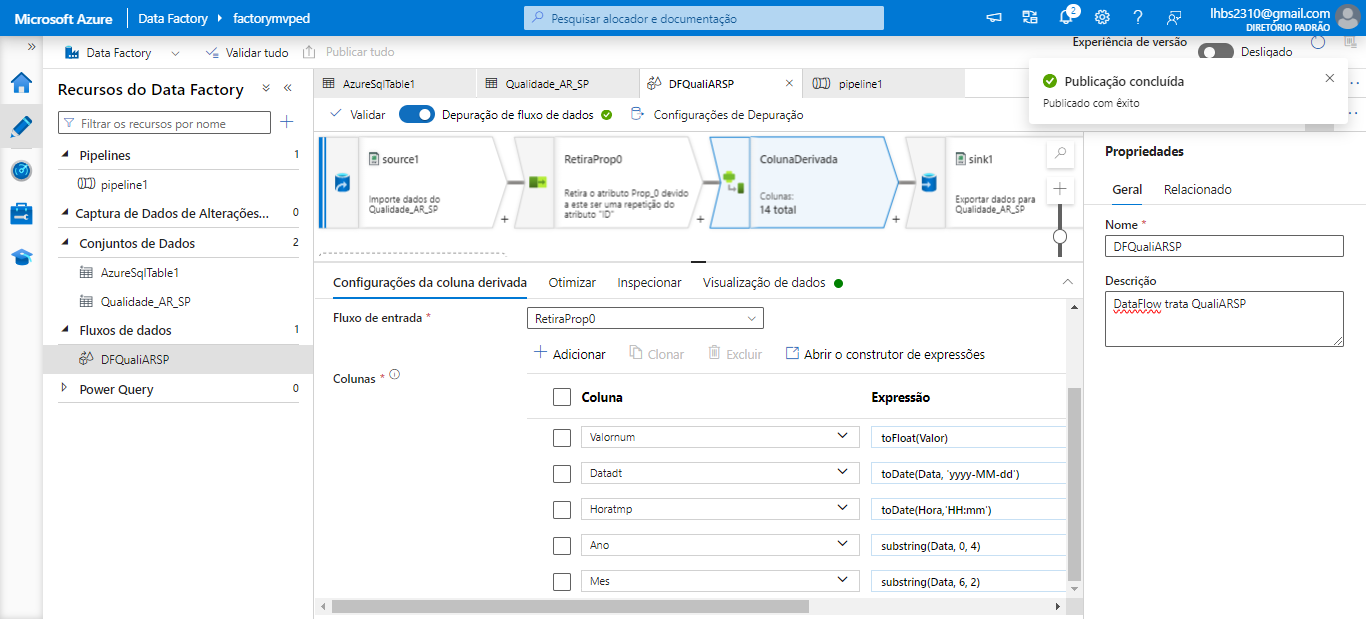

A seguir o Fluxo de dados denominado “DFQualiARSP”

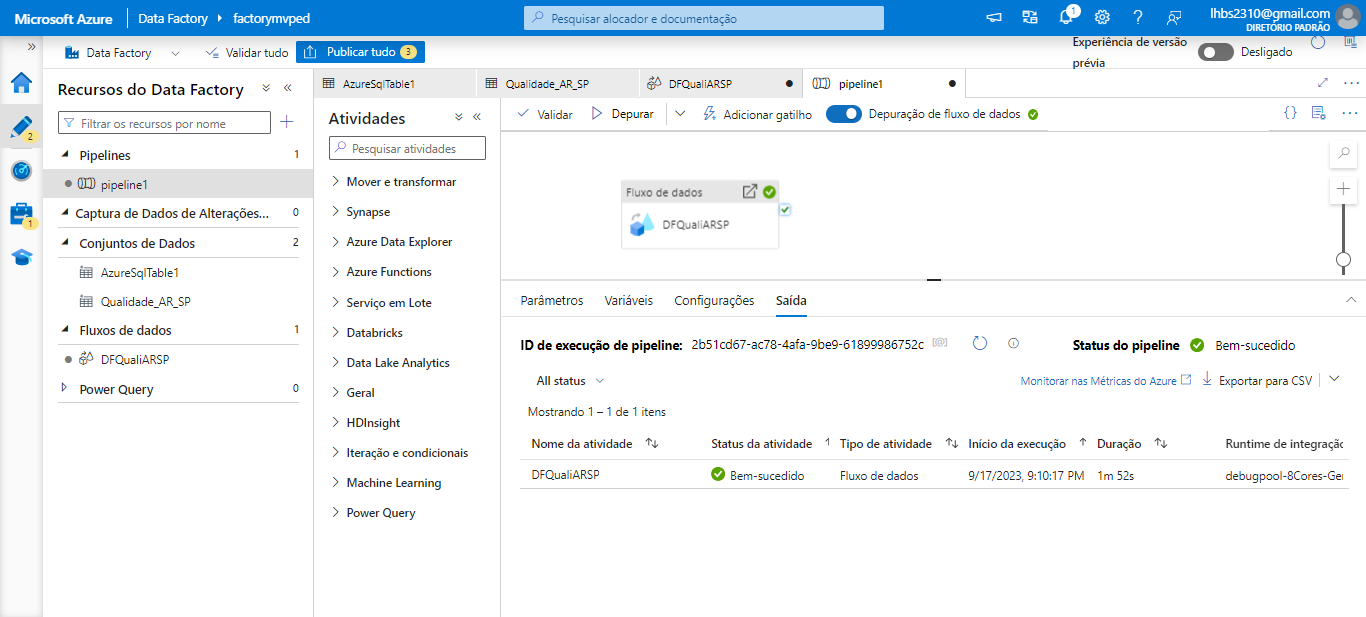

#### 2.3.2 - Processos de carga da Tabela no banco de dados

Após a etapa de carga do banco para a nuvem da AZURE, o próximo passo consistiu em construir uma conexão com o banco de dados, de maneira a permitir que sejam desenvolvidas consultas utilizando a linguagem SQL. A efetivação da conexão inicialmente ocorre através da instalação do software Azure Data Studio (ADS) na máquina local, ou seja, no computador DESKTOP utilizado.




O software ADS, foi obtido no site mostrado na figura a seguir, pelo link: https://learn.microsoft.com/en-us/sql/azure-data-studio/download-azure-data-studio?view=sql-server-ver16&tabs=redhat-install%2Credhat-uninstall

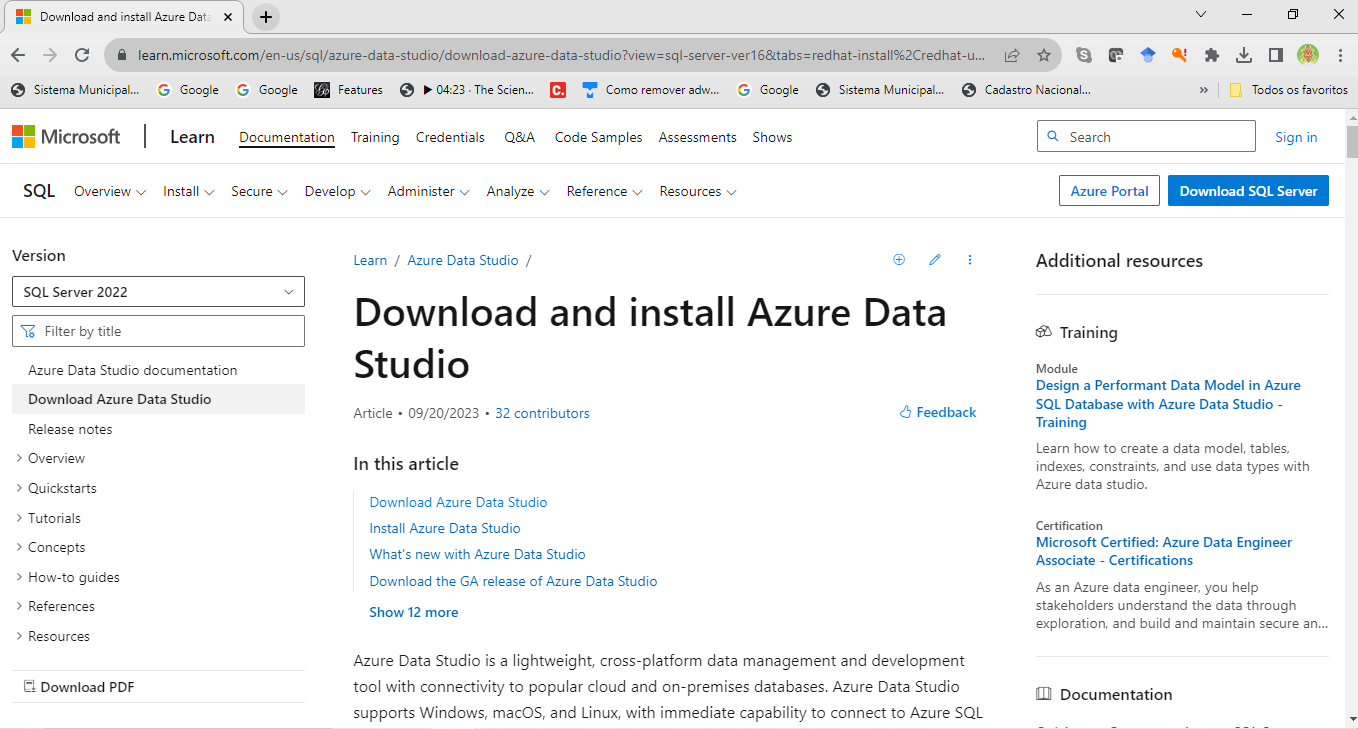

Feita a instalação do software ADS, passa a ser permitida a conexão com o servidor criado na plataforma da AZURE, e consequentemente com o banco de dados e suas tabelas. Assim ocorreu foi feita a conexão com o servidor ‘serveradminluciamvped’, permitindo acesso ao banco de dados ‘mysqldbluciamvped’ e com a tabela renomeada no momento da execução para'QualiaARSPFIM'. A imagem abaixo ilustra a conexão.

Considerando que o aplicativo ADS, permite a construção de consultas SQL foi feita uma consulta afim de verificar e ter a certeza de que a carga e a conexão ao banco de dados tinham ocorrido de forma satisfatória, o que foi confirmado com a consulta de seleção para todos os registros resultando na quantidade de 10.980.515 (dez milhões novecentos e oitenta mil e quinhentos e quinze) registros. Vide figura a seguir:

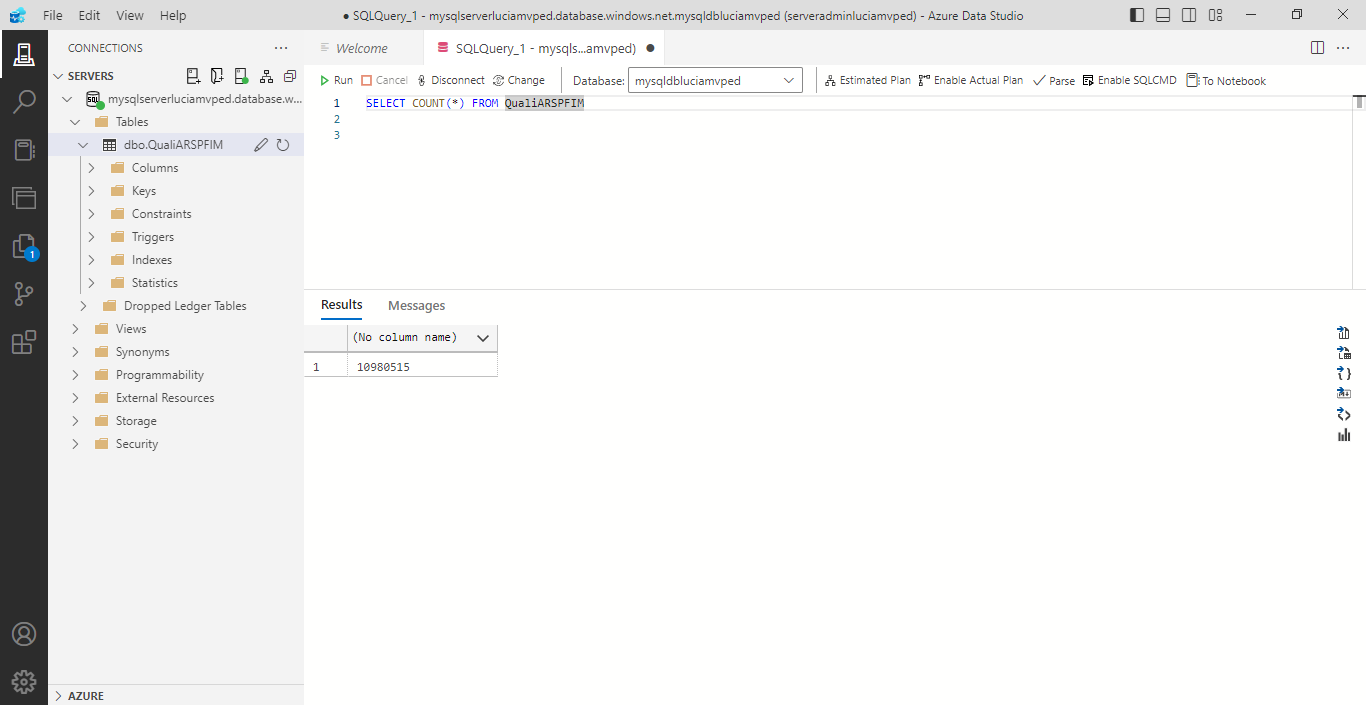

#### 2.3.3 - Motivos que implicaram na não continuidade do uso da plataforma AZURE da Microsoft

Estando o banco de dados criado, foi sentida a necessidade de criação de novos atributos informando o nome do Mês e o nome da Estação climática do ano, "Inverno, Primavera, Verão, Outono", pois tais categorias são de suma importância para a criação de gráficos e análises, porém, dado o desconhecimento no uso da plataforma, foram notados alguns erros nas tentativas de criação daí a negativas experiências anteriores no uso de serviços deste tipo de plataforma, foi decidido não mais tentar as necessárias alterações no banco de dados.


A não continuidade na utilização do ADS ocorreu também, em função de mensagens recebidas da plataforma informando sobre o uso da conta gratuita, estar restrito naquele momento com risco de ultrapassar seu limite, e consequentemente possibilitar a geração futura de custos indesejados. Diante de tal situação foram extintos todos os serviços criados como também a conta, impossibilitando desta forma dar continuidade ao aprendizado no uso da plataforma AZURE, como também de criar imagens com melhor resolução para a confecção deste documento.


Assim em função dos alarmes recebidos no que concerne ao crédito cedido pela plataforma AZURE para a conta gratuita, foi considerado apresentar as imagens abaixo das telas, demonstrando mensagens recebidas tanto na própria plataforma quanto via e-mail. Vale ressaltar que tais mensagens ocorreram em função dos alertas implementados no serviço de orçamento citado no início do texto, o cenário permitiu considerar este recurso de suma importância para controle financeiro no uso dos serviços.

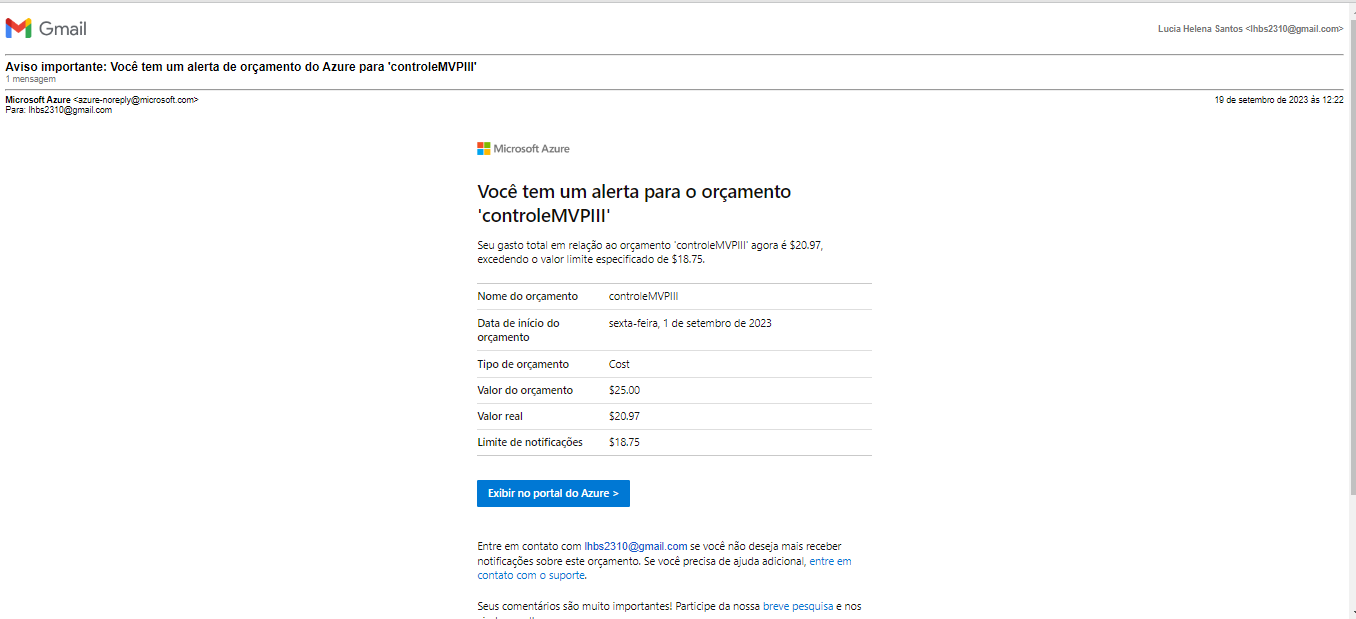

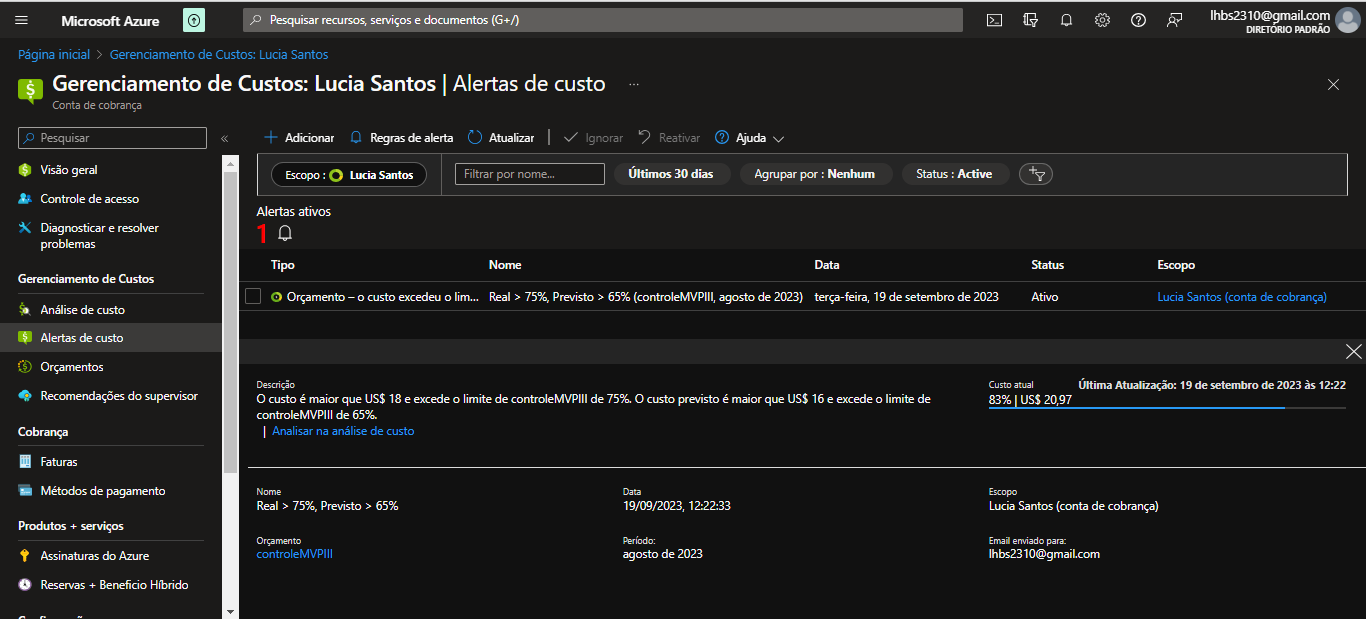

Dados os avisos de possibilidade de ultrapassar os limites de crédito cedido para a conta gratuita, foi tomada a decisão de excluir todos os serviços obtidos na plataforma da AZURE da Microsoft, não conseguindo fazer uso da linguagem de banco de dados SQL, e implementar no notebook do Colab da Gooble, o processo de transformação dos dados feitos anteriormente na AZURE, bem como as análises.

#**3 - Análise Descritiva e Exploratória dos dados**


###3.1 - Carregando bibliotecas

In [1]:
# Importe as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import numpy as np

# Libs para utilizar o Plotly
import matplotlib.pyplot as plt
import plotly.express as px
import sqlite3
import psycopg2

import warnings

from google.colab import drive # acesso ao drive do google Colab - 'drive.mount'
import os # para o retorno do caminho dos dados - 'os.chdir'

In [2]:
warnings.filterwarnings("ignore")

###3.2 - Criando Funções

In [3]:
# Função que cria a variável Nmes com os nomes dos meses do ano

def calcula_nome_mes(mes):
  vmes = mes

  if mes == 1:
    return "Janeiro"
  elif mes == 2:
    return "Fevereiro"
  elif mes == 3:
    return "Março"
  elif mes == 4:
    return "Abril"
  elif mes == 5:
    return "Maio"
  elif mes == 6:
    return "Junho"
  elif mes == 7:
    return "Julho"
  elif mes == 8:
    return "Agosto"
  elif mes == 9:
    return "Setembro"
  elif mes == 10:
    return "Outubro"
  elif mes == 11:
    return "Novembro"
  else:
    return "Dezembro"


# Função que cria a variável num com valores numéricos para as estações do ano

def calcula_estacao_ano(dt):
  vdia = dt.day
  vmes = dt.month

  if vmes in (1,2):
    return "Verão"
  elif vmes == 3:
    if vdia < 21:
      return "Verão"
    else:
      return "Outono"
  elif vmes in (4,5):
      return "Outono"
  elif vmes == 6:
      if vdia < 21:
        return "Outono"
      else:
        return "Inverno"
  elif vmes in (7,8):
      return "Inverno"
  elif vmes == 9:
      if vdia < 21:
        return "Inverno"
      else:
        return "Primavera"
  elif vmes in (10,11):
      return "Primavera"
  elif vmes == 12:
      if vdia < 21:
        return "Primavera"
      else:
        return "Verão"

# Função que cria a variável Nmes com os períodos do dia em função da hora

def calcula_periodo_dia(hora):
    vhora = hora

    if vhora in ("00:00","01:00","02:00","03:00","04:00","05:00","06:00"):
      return "Madrugada"
    elif vhora in ("07:00","08:00","09:00","10:00","11:00","12:00"):
      return "Manhã"
    elif vhora in ("13:00","14:00","15:00","16:00","17:00","18:00"):
      return "Tarde"
    else:
      return "Noite"


###3.3 - Preparando o Ambiente

In [4]:
# Apontando para My Drive

drive.mount('/content/drive', force_remount=True)

os.chdir('/content/drive/My Drive/')

Mounted at /content/drive


### 3.4 - Carregando os Dados

In [5]:
# Importando o arquivo em formato csv hospedado em My Drive

caminho = "/content/drive/My Drive/dadoarsp/SP_poluicao_dados.csv"

dadoarsp = pd.read_csv(caminho, index_col=False, delimiter=',')

In [6]:
# Verificando a estrutura dos daddos

dadoarsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10980515 entries, 0 to 10980514
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   ID          int64  
 2   Data        object 
 3   Hora        object 
 4   Estacao     object 
 5   Codigo      object 
 6   Poluente    object 
 7   Valor       float64
 8   Unidade     object 
 9   Tipo        object 
dtypes: float64(1), int64(2), object(7)
memory usage: 837.7+ MB


In [7]:
# Verificando os dados

dadoarsp

,Unnamed: 0,ID,Data,Hora,Estacao,Codigo,Poluente,Valor,Unidade,Tipo
0,0,0,2015-01-01,01:00,Americana - Vila Santa Maria,SP01,MP10,65.0,ug/m3,automatica
1,1,1,2015-01-01,02:00,Americana - Vila Santa Maria,SP01,MP10,98.0,ug/m3,automatica
2,2,2,2015-01-01,03:00,Americana - Vila Santa Maria,SP01,MP10,79.0,ug/m3,automatica
3,3,3,2015-01-01,04:00,Americana - Vila Santa Maria,SP01,MP10,53.0,ug/m3,automatica
4,4,4,2015-01-01,05:00,Americana - Vila Santa Maria,SP01,MP10,35.0,ug/m3,automatica
...,...,...,...,...,...,...,...,...,...,...
10980510,10980510,10980510,2021-02-01,01:00,Tatuapé,SP76,SO2,3.0,ug/m3,manual
10980511,10980511,10980511,2021-03-01,01:00,Tatuapé,SP76,SO2,3.0,ug/m3,manual
10980512,10980512,10980512,2021-04-01,01:00,Tatuapé,SP76,SO2,3.0,ug/m3,manual
10980513,10980513,10980513,2021-05-01,01:00,Tatuapé,SP76,SO2,5.0,ug/m3,manual


#### 3.4.1 - Qualidade dos Dados

In [8]:
# Alterando o atributo Data de object para formato date

dadoarsp['Data'] = pd.to_datetime(dadoarsp['Data'])

In [9]:
# Excluindo a primeira coluna com informação equivalente ao atributo ID

dadoarsp = dadoarsp.iloc[:, 1:]

In [10]:
# Criando as variáveis Ano e Mes com formato date

dadoarsp['Ano'] = dadoarsp['Data'].dt.year
dadoarsp['Mes'] = dadoarsp['Data'].dt.month


# Criando a variável "nmes" dando nome aos meses dos anos

dadoarsp["nmes"] = dadoarsp["Mes"].apply(calcula_nome_mes)


# Criando a variável "estacao_ano" para identificar as estações climáticas

dadoarsp["estacao_ano"] = dadoarsp["Data"].apply(calcula_estacao_ano)


# Criando a variável "periodo_dia" para identificar manhã, tarde ou noite

dadoarsp["periodo_dia"] = dadoarsp["Hora"].apply(calcula_periodo_dia)

In [11]:
# Verificando os dados após as tranformações

dadoarsp

,ID,Data,Hora,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Ano,Mes,nmes,estacao_ano,periodo_dia
0,0,2015-01-01,01:00,Americana - Vila Santa Maria,SP01,MP10,65.0,ug/m3,automatica,2015,1,Janeiro,Verão,Madrugada
1,1,2015-01-01,02:00,Americana - Vila Santa Maria,SP01,MP10,98.0,ug/m3,automatica,2015,1,Janeiro,Verão,Madrugada
2,2,2015-01-01,03:00,Americana - Vila Santa Maria,SP01,MP10,79.0,ug/m3,automatica,2015,1,Janeiro,Verão,Madrugada
3,3,2015-01-01,04:00,Americana - Vila Santa Maria,SP01,MP10,53.0,ug/m3,automatica,2015,1,Janeiro,Verão,Madrugada
4,4,2015-01-01,05:00,Americana - Vila Santa Maria,SP01,MP10,35.0,ug/m3,automatica,2015,1,Janeiro,Verão,Madrugada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10980510,10980510,2021-02-01,01:00,Tatuapé,SP76,SO2,3.0,ug/m3,manual,2021,2,Fevereiro,Verão,Madrugada
10980511,10980511,2021-03-01,01:00,Tatuapé,SP76,SO2,3.0,ug/m3,manual,2021,3,Março,Verão,Madrugada
10980512,10980512,2021-04-01,01:00,Tatuapé,SP76,SO2,3.0,ug/m3,manual,2021,4,Abril,Outono,Madrugada
10980513,10980513,2021-05-01,01:00,Tatuapé,SP76,SO2,5.0,ug/m3,manual,2021,5,Maio,Outono,Madrugada


In [12]:
dadoarsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10980515 entries, 0 to 10980514
Data columns (total 14 columns):
 #   Column       Dtype         
---  ------       -----         
 0   ID           int64         
 1   Data         datetime64[ns]
 2   Hora         object        
 3   Estacao      object        
 4   Codigo       object        
 5   Poluente     object        
 6   Valor        float64       
 7   Unidade      object        
 8   Tipo         object        
 9   Ano          int64         
 10  Mes          int64         
 11  nmes         object        
 12  estacao_ano  object        
 13  periodo_dia  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(9)
memory usage: 1.1+ GB


In [13]:
# verificando nulls - valores faltantes no dataset

dadoarsp.isnull().sum()

ID             0
Data           0
Hora           0
Estacao        0
Codigo         0
Poluente       0
Valor          0
Unidade        0
Tipo           0
Ano            0
Mes            0
nmes           0
estacao_ano    0
periodo_dia    0
dtype: int64

In [14]:
# Sumário estatístico para o poluentes MP10, afim de se obter a média dos
# valores do poluente a ser utilizada nos gráficos

descricao_valor = dadoarsp['Valor'].describe()
print(descricao_valor)

count    1.098052e+07
mean     8.330876e+01
std      2.500071e+02
min      0.000000e+00
25%      9.000000e+00
50%      2.200000e+01
75%      4.500000e+01
max      9.981292e+03
Name: Valor, dtype: float64


In [15]:
del descricao_valor

### ***3.5 - Análise Exploratória por poluente***

Nesta etapa, estudamos o comportamento dos poluentes selecionados, que, como mencionado anteriormente, além de terem influência na evolução de doenças respiratórias, podem interferir negativamente no ecossistema. Inicialmente, selecionamos as variáveis de interesse para cada um dos poluentes em questão, em função da observação dos valores apresentados.

É importante observar que, devido ao tamanho da base de dados e à falta de utilização de um ambiente apropriado de banco de dados, optou-se em realizar a exclusão do conjunto de dados (DATASET) utilizado no final de cada bloco de análise de determinado poluente, tal ação foi feita com o objetivo de não comprometer o desempenho do notebook, reforçando a ideia de que, para lidar com grandes volumes de dados, como é o caso a ser considerado pela a capacidade de armazenamento e execução no notebook Colab, ser de suma importância o uso de hospedagem de dados em nuvem, por meio da criação de um DATALAKE ou DATA WAREHOUSE.

Para as análises destes poluentes atemosféricos foram feitas descrições de seus valores, como forma de possibilitar a comparação de seu comportamento com medidas estatísticas descritivas como valor mínimo, valor máximo, quartil, percentil; medida de tendência central como a média além da medida de dispersão como o desvio-padrão, todas com a finalidade de auxiliar nas interpretações estatísticas.

In [16]:
# Configurar a opção de formatação para números de ponto flutuante,
# para os valores da função describe

pd.options.display.float_format = '{:.2f}'.format


#### 3.5.1 - MP10

A relevância do estudo do poluente MP10 está atrelada aos impactos significativos para a saúde humana como problemas respiratórios, ou o agravamento de condições respiratórias pré-existentes (como asma e bronquite). Estudos revelam que a grande exposição a partículas MP10 está associada a um maior risco de doenças cardiovasculares, como ataques cardíacos e derrames, devido à inflamação sistêmica e ao estresse oxidativo.

Quanto às implicações ambientais o poluente MP10 contribui para a má qualidade do ar, afetando a visibilidade do ambiente e causando problemas de saúde em animais selvagens e ecossistemas, além de transportar poluentes atmosféricos, incluindo nutrientes como nitrogênio e enxofre, que, quando depositados no solo ou na água, também podem afetar negativamente ecossistemas terrestres e aquáticos, prejudicando a biodiversidade e a qualidade geral do meio ambiente.


In [17]:
# Selecionando no banco dadoarsp o poluentes MP10

dadoarMP10 = dadoarsp[['Data','Estacao', 'Poluente', 'Valor', 'Ano','estacao_ano','periodo_dia']]
dadoarMP10 = dadoarMP10.loc[  dadoarMP10 ['Poluente'] == 'MP10' ]

In [18]:
# Verificando o banco dadoarMP10

dadoarMP10

,Data,Estacao,Poluente,Valor,Ano,estacao_ano,periodo_dia
0,2015-01-01,Americana - Vila Santa Maria,MP10,65.00,2015,Verão,Madrugada
1,2015-01-01,Americana - Vila Santa Maria,MP10,98.00,2015,Verão,Madrugada
2,2015-01-01,Americana - Vila Santa Maria,MP10,79.00,2015,Verão,Madrugada
3,2015-01-01,Americana - Vila Santa Maria,MP10,53.00,2015,Verão,Madrugada
4,2015-01-01,Americana - Vila Santa Maria,MP10,35.00,2015,Verão,Madrugada
...,...,...,...,...,...,...,...
10980190,2021-11-20,Santa Gertrudes - Jd. Luciana,MP10,24.00,2021,Primavera,Madrugada
10980191,2021-11-26,Santa Gertrudes - Jd. Luciana,MP10,27.00,2021,Primavera,Madrugada
10980192,2021-12-02,Santa Gertrudes - Jd. Luciana,MP10,49.00,2021,Primavera,Madrugada
10980193,2021-12-08,Santa Gertrudes - Jd. Luciana,MP10,53.00,2021,Primavera,Madrugada


In [19]:
# Sumário estatístico para o poluentes MP10, afim de se obter a média dos
# valores do poluente a ser utilizada nos gráficos

descricao_valor = dadoarMP10['Valor'].describe()
print(descricao_valor)

count   2883216.00
mean         29.21
std          25.96
min           0.00
25%          13.00
50%          22.00
75%          37.00
max        1924.00
Name: Valor, dtype: float64


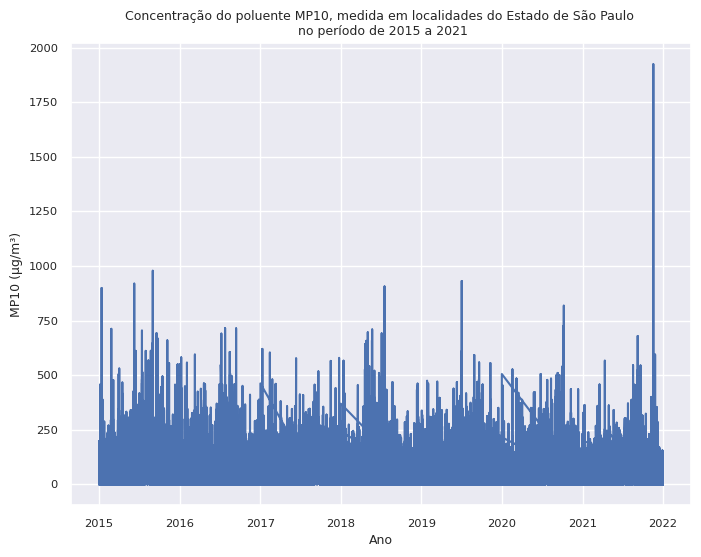

In [20]:
# Gráfico de linhas da série histórica do poluente MP10

sns.set_style('darkgrid')
sns.set_theme(style="darkgrid", font_scale=0.75)
plt.figure(figsize=(8, 6))
plt.ylabel("MP10 (µg/m³)")
plt.xlabel("Ano")
plt.plot(dadoarMP10['Data'], dadoarMP10['Valor'])
plt.title('Concentração do poluente MP10, medida em localidades do Estado de São Paulo \n no período de 2015 a 2021')
plt.show()

O gráfico de linhas permite verificar um comportamento atípico ocorrido no ano de 2021 para o poluente MP10, sendo assim um ano que sugere investigação em relação ao período do ano e em que local ocorreu tal compotamento.

Em função desta observação é criado um DATASET com dados referetente ao ano de 2021 e valores válidos a seguir.

In [21]:
# Selecionando valores MP10 para o Ano de 2021

dadoarMP10_2021 = dadoarMP10[(dadoarMP10['Ano'] == 2021) & (dadoarMP10['Valor'] > 0)]

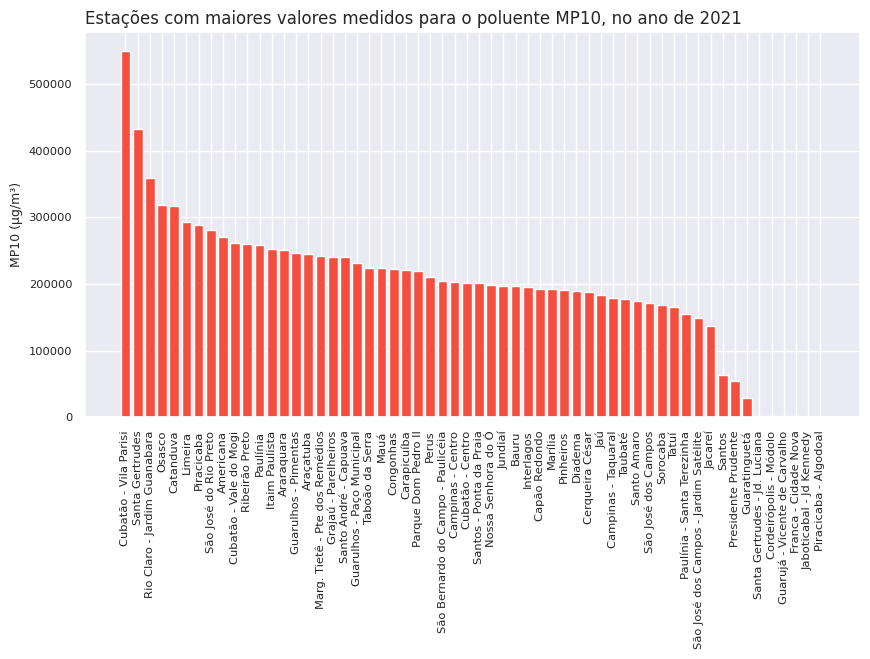

In [22]:
# analise por Estação ao longo do período 2015 - 2022

Graf_Munic = dadoarMP10_2021.groupby( by=['Estacao'] ).sum().reset_index()[['Estacao', 'Valor']].sort_values( 'Valor', ascending=False )
Graf_Munic.head()
plt.figure( figsize=(10, 5) )
plt.title( 'Estações com maiores valores medidos para o poluente MP10, no ano de 2021', loc='left', fontsize=12 )
plt.bar( Graf_Munic.Estacao, Graf_Munic['Valor'], color='#f44e3f' )
plt.ylabel('MP10 (µg/m³)')
plt.xticks( rotation=90 );

Interessante obervar que o DATASET "dadoarMP10_2021" criado, permitiu através do gráfico anterior observar que no ano de 2021, o valor atípico do poluente MP10 ocorreu na estação de Cubatão - Vila Parisi.

In [23]:
# Consulta para o valor máximo do poluente MP10

resultado = dadoarMP10_2021[dadoarMP10_2021['Valor'] == 1924]
# Verifique se algum registro foi encontrado
if not resultado.empty:
    print("Registro encontrado:")
    print(resultado)
else:
    print("Registro não encontrado.")

Registro encontrado:
              Data                Estacao Poluente   Valor   Ano estacao_ano  \
9820871 2021-11-18  Cubatão - Vila Parisi     MP10 1924.00  2021   Primavera   

        periodo_dia  
9820871   Madrugada  


Na variável 'descricao_valor' foi obtido o valor máximo que o poluente MP10 atingiu no período observado, possibilitando desta forma verificar, não apenas a Estação de ocorrência mas também a data, sendo esta em 18 de novembro de 2021, na estação da primavera.

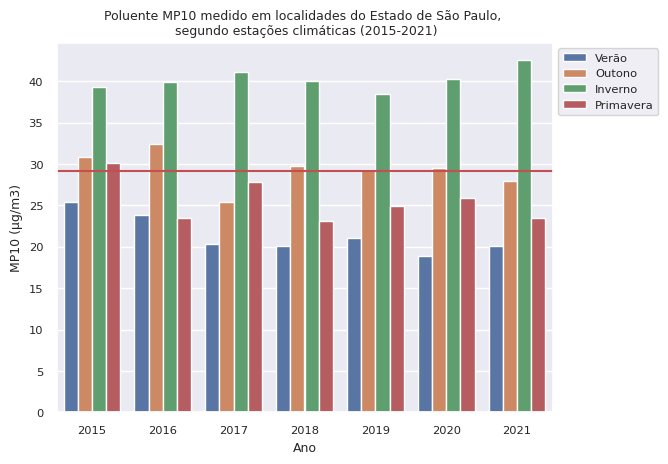

In [24]:
# Gráfico de barras referente à MP10

gfg = sns.barplot(x = "Ano", y = "Valor", hue = "estacao_ano", data = dadoarMP10, errorbar=None);
plt.axhline(y=29.20, color='r', linestyle='-')
plt.title("Poluente MP10 medido em localidades do Estado de São Paulo, \n segundo estações climáticas (2015-2021)")
plt.ylabel("MP10 (µg/m3)")
gfg.legend(fontsize=8)
gfg.legend(bbox_to_anchor= (1,1))
plt.show();

Analisando o comportamento do poluente MP10 pelo gráfico de barras anterior, verica-se que o mesmo apresenta valores altos sempre no inverno, estes inclusive acima da média observada representada pela linha vermelha com valor de 29.20 µg/m3.

Ainda que tenha apresntado valores acima da média, o poluente ao longo do período, não superou o valor estabelecido pela Organização Mundial de Saúde (OMS) como sendo o limite aceitávvel para curta exposição no valor de 50 µg/m3.

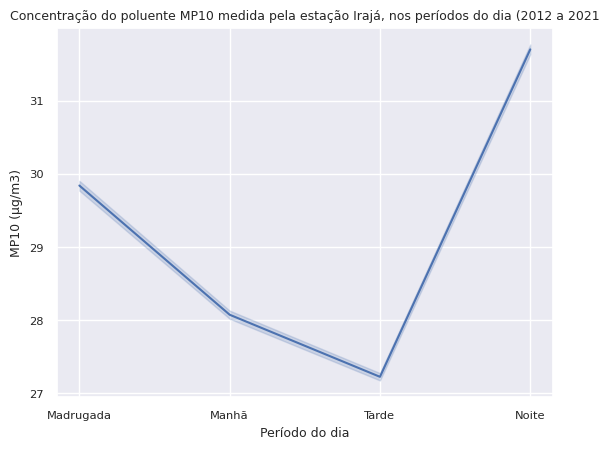

In [25]:
# Gráfico de linhas

sns.lineplot(x='periodo_dia', y='Valor', data = dadoarMP10)
plt.title('Concentração do poluente MP10 medida pela estação Irajá, nos períodos do dia (2012 a 2021')
plt.xlabel("Período do dia")
plt.ylabel("MP10 (µg/m3)");

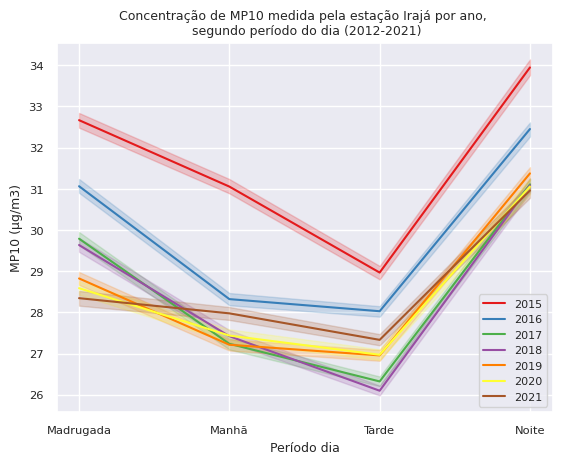

In [27]:
# Gráfico de linha da concentração de MP10 ao longo do dia

# Defina uma paleta de cores personalizada
palette = sns.color_palette("Set1", len(dadoarMP10["Ano"].unique()))

sns.lineplot(
    data=pd.DataFrame(dadoarMP10),
    x="periodo_dia", y="Valor", hue="Ano",
    palette=palette,
    sort=True
)
plt.title("Concentração de MP10 medida pela estação Irajá por ano, \n segundo período do dia (2012-2021)")
plt.xlabel("Período dia")
plt.ylabel("MP10 (µg/m3)")
plt.legend(fontsize=8);

In [28]:
# Apagando as tabelas utilizadas na análise do poluente MP10

tabelasMP10 = [dadoarMP10,dadoarMP10_2021]
for tabela in tabelasMP10:
    del tabela

#### 3.5.2 - MP2.5

Embora ambos MP10 e MP2.5 possam ser prejudiciais à saúde, as partículas MP2.5 são consideradas mais agressivas devido ao seu tamanho menor, e por consequência, apresentarem maior capacidade de penetração nos pulmões e na corrente sanguínea com impacto mais grave na saúde humana.

As partículas do poluente MP2.5 podem atingir os alvéolos pulmonares, onde ocorrem as trocas gasosas, possibilitando causar danos mais sérios, estando assim associada a um maior risco de doenças cardiovasculares, câncer de pulmão, ataques cardíacos e até mesmo morte prematura.

Muitos países têm regulamentações mais rigorosas para MP2.5, daí a importância do monitoramento deste poluente para avaliar a qualidade do ar, devido a atenção especial ser dada às partículas menores.


In [ ]:
# Selecionando no banco dadoarsp o poluentes MP2.5

dadoarMP2_5 = dadoarsp[['Data','Estacao','Poluente','Valor','Ano','estacao_ano','nmes','Mes','periodo_dia','Hora']]
dadoarMP2_5 = dadoarMP2_5.loc[  dadoarMP2_5 ['Poluente'] == 'MP2.5' ]

In [ ]:
# Verificando o banco dadoarMP2_5

dadoarMP2_5

In [ ]:
descricao_valor = dadoarMP2_5['Valor'].describe()
print(descricao_valor)

In [ ]:
# Gráfico de linhas da série histórica do poluente MP2.5

sns.set_style('darkgrid')
sns.set_theme(style="darkgrid", font_scale=0.75)
plt.ylabel("MP2.5 (µg/m3)")
plt.xlabel("Ano")
plt.plot(dadoarMP2_5['Data'], dadoarMP2_5['Valor'])
plt.title('Concentração do poluente MP2.5 em localidades do estado de São Paulo \n no período 2015 a 2021');

O gráfico acima da série longitudinal no período, aponta alta de concentração do poluente MP2.5, nos anos de 2015, 2016 e principalmente no ano de 2018, com o valor destoando de maneira considerável neste último ano, tal ano é passível de análise afim de verificar o local de ocorrência.

In [ ]:
# Selecionando valores MP10 para o Ano de 2015 2016 2017

dadoarMP2_5_2015 = dadoarMP2_5[(dadoarMP2_5['Ano'] == 2015) & (dadoarMP2_5['Valor'] > 0)]
dadoarMP2_5_2016 = dadoarMP2_5[(dadoarMP2_5['Ano'] == 2016) & (dadoarMP2_5['Valor'] > 0)]
dadoarMP2_5_2018 = dadoarMP2_5[(dadoarMP2_5['Ano'] == 2018) & (dadoarMP2_5['Valor'] > 0)]

In [ ]:
# Análise por Estação ao longo no ano de 2015

Graf_Munic = dadoarMP2_5_2015.groupby( by=['Estacao'] ).sum().reset_index()[['Estacao', 'Valor']].sort_values( 'Valor', ascending=False )
Graf_Munic.head()
plt.figure( figsize=(10,5) )
plt.title( 'Estações com maiores valores medidos para o poluente MP2.5 no ano de 2015', fontsize=10 )
plt.bar( Graf_Munic['Estacao'], Graf_Munic['Valor'], color='#f44e3f' )
plt.ylabel('MP10 (µg/m³)')
plt.xticks( rotation=90 );

Para o ano de 2015 as estações com maiores valores demonstrados para o poluente em questão, foram: Marg. Tietê - Pte dos Remédios, Congonhas e Grajaú Palhereiros. Muitos podem ser os motivos para a alto do poluente na primeira estação citada, porém é de conhecimento que em tal localidade ocorre alto fluxo de veículos.

In [ ]:
# Análise por Estação ao longo do ano de 2016

Graf_Munic = dadoarMP2_5_2016.groupby( by=['Estacao'] ).sum().reset_index()[['Estacao', 'Valor']].sort_values( 'Valor', ascending=False )
Graf_Munic.head()
plt.figure( figsize=(10,5) )
plt.title( 'Estações com maiores valores medidos para o poluente MP2.5 no ano de 2016', fontsize=10 )
plt.bar( Graf_Munic['Estacao'], Graf_Munic['Valor'], color='#f44e3f' )
plt.ylabel('MP10 (µg/m³)')
plt.xticks( rotation=90 );

Para o ano de 2016 o gráfico acima ainda confirma a baixa qualidado do ar no que tange ao poluente MP2.5, para a estação Marg. Tietê - Pte dos Remédios, estando agora diferente do ano anterior, seguido de Campinas - Vila União, e também confirmando a estação de Congonhas, devido ao alto nível tráfego veicular especialmente aqueles que funcionam com combustíveis fósseis, além da presença de presença de indústrias, fábricas e atividades comerciais.

In [ ]:
# Análise por Estação ao longo do ano de 2018

Graf_Munic = dadoarMP2_5_2018.groupby( by=['Estacao'] ).sum().reset_index()[['Estacao', 'Valor']].sort_values( 'Valor', ascending=False )
Graf_Munic.head()
plt.figure( figsize=(10,5) )
plt.title( 'Estações com maiores valores medidos para o poluente MP2.5 no ano de 2017', fontsize=10 )
plt.bar( Graf_Munic['Estacao'], Graf_Munic['Valor'], color='#f44e3f' )
plt.ylabel('MP10 (µg/m³)')
plt.xticks( rotation=90 );

No ano de 2018 ressalta a inserção da estação de Guarulhos - Pimentas, além das outras anteriormente citadas. É importante para a tomada de políticas públicas a observação e a pesquisa nestas localidades, com o propósito de vericar a ocorrência de algum fenômeno ou evento ocorrido na localidade de Guarulhos no ano.

In [ ]:
# Gráfico de barras referente ao poluente MP2.5

gfg = sns.barplot(x = "Ano", y = "Valor", hue = "estacao_ano", data = dadoarMP2_5, errorbar=None);
plt.axhline(y=15.75, color='r', linestyle='-')
plt.title("Poluente MP2.5 medido em localidades do Estado de São Paulo, \n segundo estações climáticas (2015-2021)")
plt.ylabel("MP2.5 (µg/m3)")
gfg.legend(fontsize=8)
gfg.legend(bbox_to_anchor= (1,1))
plt.show();

O gráfico de barras anterior demonstra de maneira clara, a alta concentração do poluente MP2.5, em todos os anos observados na estação meteorológica do inverno e em alguns anos como 2016, 2018 e 2019 no outono, ou seja, as condições climáticas específicas do outono e do inverno, como inversões térmicas, baixa dispersão do ar e ventos mais fracos, criam um ambiente propício para o aumento dos níveis de PM2,5.

In [ ]:
# Selecionando no banco dadoarMP2_5 os Anos de 2016 a 2016 a 2018 e 2021

dadoarMP2_5_2015_2021 = dadoarMP2_5[['Valor','Ano','estacao_ano','Mes', 'nmes']]
dadoarMP2_5_2015_2021 = dadoarMP2_5_2015_2021.loc[ ( dadoarMP2_5 ['Ano'] == 2015) | (dadoarMP2_5 ['Ano'] == 2016) | ( dadoarMP2_5 ['Ano'] == 2017) |
                                                   ( dadoarMP2_5 ['Ano'] == 2018) | ( dadoarMP2_5 ['Ano'] == 2021) ]

In [ ]:
# Gráfico de barras referente ao MP2.5

gfg = sns.barplot(x = "Ano", y = "Valor", hue = "nmes", data = dadoarMP2_5_2015_2021, errorbar=None);
plt.axhline(y=17.32, color='r', linestyle='-')
plt.title("Concentração do poluente MP2.5 em localidades do Estado de São Paulo, \n por mês nos anos de 2015 a 2018 e 2021")
plt.ylabel("MP2.5 (µg/m3)")
gfg.legend(fontsize = 4.5)
gfg.legend(bbox_to_anchor = (1,1))
plt.show();

O gráfico de barras destaca os meses de julho a setembro, meses que pertencem à estação meteorológica do inverno, com destaque para os meses : setembro de 2017 e julho de 2018, seguido de agosto de 2015 e julho de 2016 e julho a setembro de 2021, onde em todos estes períodos a concentração do poluentes MP2.5 superou a média do período observado.

In [ ]:
# Gráfico de linhas

sns.lineplot(x='periodo_dia', y='Valor', data = dadoarMP2_5)

plt.title('Concentração do poluente MP2.5 medida em localidades do Estado de São Paulo, \n nos períodos do dia (2015 a 2021)')
plt.xlabel("Período do dia")
plt.ylabel("MP2.5 (µg/m3)");

In [ ]:
# Gráfico de linha da concentração de MP2.5 ao longo do dia

# Defina uma paleta de cores personalizada
palette = sns.color_palette("Set1", len(dadoarMP2_5["Ano"].unique()))

sns.lineplot(
    data=pd.DataFrame( dadoarMP2_5),
    x="periodo_dia", y="Valor", hue="Ano",
    palette=palette,
    sort=True
)
plt.title('Concentração de MP2.5 medida em localidades do Estado de São Paulo, \n nos períodos do dia (2015 a 2021)', fontsize=10)
plt.xlabel("Período dia")
plt.ylabel("MP2.5 (µg/m3)")
plt.legend(fontsize=8);

O destaque no gráfico anterior é para o período do início da manhã ao início da tarde do ano de 2015, onde diferente dos outros anos, a concentração do poluente MP2.5, apresenta valor alto, acima de 16 µg/m3, com tendência à sua diminuição quando se aproxima o início da tarde.

Para os outros anos o valor da concentração deste poluente no início da manhã se apresenta abaixo de 15 µg/m3, tendendo ao aumento ou estabilidade, no período. Exceto para o ano de 2021, onde o início da manhã apesar de também se apresentar abaixo de 15 µg/m3, porém com tendência de queda no período semelhante ao ano de 2015.

Vale observar também o comportamento diferenciado, com tendência de queda, no período de início da noite até o início da madrugada para os anos de 2016 e 2019, distoando dos outros anos.

In [ ]:
# Apagando as tabelas utilizadas na análise do poluente MP2.5

tabelasMP2_5 = [dadoarMP2_5,dadoarMP2_5_2015,dadoarMP2_5_2016,dadoarMP2_5_2018,dadoarMP2_5_2015_2021]
for tabela in tabelasMP10:
    del tabela

#### 3.5.3 - Ozônio (O3)

O controle da concentração de O3 (ozônio) para avaliação e monitoramento da qualidade do ar, é de extrema seja para a saúde humana seja para o meio ambiente, devido aos impactos adversos que altos níveis desse gás podem ter.  Estudos têm associado que a exposição à longo prazo ao ozônio, reflete um aumento nas hospitalizações e mortes relacionadas a doenças respiratórias e cardiovasculares. O impacto na saúde de crianças, idosos e pessoas com condições de saúde preexistentes, se torna mais intenso dada a vulnerabilidade destas pessoas aos efeitos adversos do ozônio, tornando-o um poluente especialmente preocupante para esses grupos. Daí a importância a respeito da divulgação de informações sobre a concentração de ozônio são importantes para a proteção da saúde das pessoas permitindo que estas tomem medidas para reduzir a exposição em dias de alta concentração de O3, como evitar atividades ao ar livre durante as horas de pico de poluição.

Em relação ao meio ambiente é mais do que conhecido a influência que o ozônio apresenta sobre as mudanças climáticas, pois, embora o ozônio seja um poluente atmosférico de curta duração, ele é um poderoso gás de efeito estufa quando presente na alta atmosfera. Portanto, seu controle é importante para mitigar as mudanças do clima, não esquecendo da poluição do solo e da água, pois quando o O3 com outros poluentes atmosféricos, como por exemplo o nitrogênio (NO2), esta interação possibilita a deposição de ácidos atmosféricos, que podem prejudicar o solo e a qualidade da água.






In [ ]:
# Selecionando no banco dadoarsp o poluentes O3

dadoarO3 = dadoarsp[['Data','Estacao','Poluente','Valor','Ano','estacao_ano','nmes','Mes','periodo_dia','Hora']]
dadoarO3 = dadoarO3.loc[  dadoarO3 ['Poluente'] == 'O3' ]

In [ ]:
# Verificando o banco dadoarO3

dadoarO3

In [ ]:
descricao_valor = dadoarO3['Valor'].describe()
print(descricao_valor)

In [ ]:
# Gráfico de linhas da série histórica do poluente Ozônio (O3)

sns.set_style('darkgrid')
sns.set_theme(style="darkgrid", font_scale=0.75)
plt.ylabel("O3 (µg/m3)")
plt.xlabel("Ano")
plt.plot(dadoarO3['Data'], dadoarO3['Valor'])
plt.title('Concentração do poluente O3, medida em localidades do Estado de São Paulo \n no período de 2015 a 2021');

O gráfico de linhas sobre a série destaca de forma acentuada o final do ano de 2018 e começo do ano de 2019, onde em 2019 também se destacando ainda que em menor escala 2019.

In [ ]:
# Selecionando valores O3 para o Ano de 2018

dadoarO3_2018 = dadoarO3[(dadoarO3['Ano'] == 2018) & (dadoarO3['Valor'] > 0)]

In [ ]:
# analise por Municípios no ano de 2018
Graf_Munic = dadoarO3_2018.groupby( by=['Estacao'] ).sum().reset_index()[['Estacao', 'Valor']].sort_values( 'Valor', ascending=False )
Graf_Munic.head()
plt.figure( figsize=(10,5) )
plt.title( 'Estações com maiores valores medidos para o poluente O3 no ano de 2018', fontsize=12 )
plt.bar( Graf_Munic['Estacao'], Graf_Munic['Valor'], color='#f44e3f' )
plt.ylabel('O3 (µg/m³)')
plt.xticks( rotation=90 );

Ainda que não seja objeto deste estudo, avaliar as diferenças de clima, relevo e geologia, das duas estações com maiores níveis na concentração do poluente ozônio em 2018, no caso, Ribeirão Preto e Marilia em relação as duas últimas com menores níveis, as estações Paulínia - Sul e Americana - Vila Santa Maria, seria um estudo interessante sobre a diferença de comportamento explicado pelo gráfico.

In [ ]:
# Selecionando valores O3 para o Ano de 2019

dadoarO3_2019 = dadoarO3[(dadoarO3['Ano'] == 2019) & (dadoarO3['Valor'] > 0)]

In [ ]:
# analise por Municípios no ano de 2019

Graf_Munic = dadoarO3_2019.groupby( by=['Estacao'] ).sum().reset_index()[['Estacao', 'Valor']].sort_values( 'Valor', ascending=False )
Graf_Munic.head()
plt.figure( figsize=(10,5) )
plt.title( 'Estações com maiores valores medidos para o poluente O3 no ano de 2019', fontsize=12 )
plt.bar( Graf_Munic['Estacao'], Graf_Munic['Valor'], color='#f44e3f' )
plt.ylabel('O3 (µg/m³)')
plt.xticks( rotation=90 );

In [ ]:
# Gráfico de barras referente à ozônio O3

gfg = sns.barplot(x = "Ano", y = "Valor", hue = "estacao_ano", data = dadoarO3, errorbar=None);
plt.axhline(y=39.88, color='r', linestyle='-')
plt.title("Concentração do poluente ozônio O3 medido pela estação Irajá por ano, \n segundo estações climáticas (2015-2021)")
plt.ylabel("O3 (µg/m3)")
gfg.legend(fontsize=8)
gfg.legend(bbox_to_anchor= (1,1))
plt.show();

No gráfico de barras referente aos anos para o poluente O3 segundo as estações meteorológicas do ano é possível observar as maiores concentrações ocorrem na primavera e no verão, sugerindo alguma relação com altas temperaturas. Apresentando o inverno de 2020 e 2021 com valores um pouco acima da média apresentada pelo poluente no período.

In [ ]:
# Selecionando no banco dadoarIR_grf os Anos de 2013 e 2020

dadoarO3_2015_2020 = dadoarO3[['Valor','Ano','estacao_ano','Mes', 'nmes']]
dadoarO3_2015_2020 = dadoarO3_2015_2020.loc[ ( dadoarO3 ['Ano'] == 2015) | (dadoarO3 ['Ano'] == 2017 ) |
                                             ( dadoarO3 ['Ano'] == 2019) | (dadoarO3 ['Ano'] == 2020 ) ]

In [ ]:
# Gráfico de barras referente ao O3

gfg = sns.barplot(x = "Ano", y = "Valor", hue = "nmes", data = dadoarO3_2015_2020, errorbar=None);
plt.axhline(y=39.88, color='r', linestyle='-')
plt.title("Concentração do poluente O3 medido pela estação Irajá por mês, \n nos anos de 2015, 2017 2019 e 2020")
plt.ylabel("O3 (µg/m3)")
gfg.legend(fontsize = 4.5)
gfg.legend(bbox_to_anchor = (1,1))
plt.show();

No gráfico anterior é reforçada a ideia da forte relação da concentração do poluente O3 nos meses com maiores temperaturas, onde seu são apresentados valores acima da média do período, iniciando a concentração no mês de setembro continuando até dezembro, correspondendo à estação meteorológica da primavera de setembro a dezembro. Interessante verificar o comportamento atípico nos meses de março e abril de 2020.

In [ ]:
# Gráfico de linhas

sns.lineplot(x='periodo_dia', y='Valor', data = dadoarO3)
plt.title('Concentração do poluente O3 medida pela estação Irajá, \n nos períodos do dia (2012 a 2021')
plt.xlabel("Período do dia")
plt.ylabel("O3 (µg/m3)");

In [ ]:
# Gráfico de linha da concentração de NO2 ao longo do dia

sns.lineplot(
    data=pd.DataFrame(dadoarO3),
    x="periodo_dia", y="Valor", hue="Ano",
    sort=True
)
plt.title("Concentração de O3 medida em localidades do Estado de São Paulo por ano, \n segundo período do dia (2015-2021)")
plt.xlabel("Período dia")
plt.ylabel("O3 (µg/m3)")
plt.legend(fontsize=8);

O gráfico de linha confirma a suspeita de relação entre a concentração do poluente O3 com a alta temperatura, pois seu pico ocorre no perído que se inicia, do final da da manhã até o final da tarde, e os menores valores são observados nos horários sem a presença da luz solar, ou seja, à noite e na madrugada. Em todos os anos o comportamento do poluente ozônio em relação aos períodos do dia, se mostrou padrão.

In [ ]:
# Apagando as tabelas utilizadas na análise do poluente O3

tabelasO3 = [dadoarO3,dadoarO3_2018,dadoarO3_2019,dadoarO3_2015_2020]
for tabela in tabelasMP10:
    del tabela

#### 3.5.4 - Dióxido de Nitrogênio (NO2)

Muitos são os efeitos negativos provocados pela longa exposição à altos níveis do poluente dióxido de nitrogênio (NO2), seus impactos na saúde humana podem variar de irritação das vias respiratórias e seu agravamento até ataque de asma ou aumento dos sintomas da pulmonar obstrutiva crônica (DPOC), para pessoas com condições respiratórias pré-existentes. Também não se deve serem desconsiderados os efeitos no meio ambiente, principalmente em sua contribuição para a má qualidade do ar podendo afetar a flora e fauna, causando danos a ecossistemas aquáticos e terrestres.


Importante lembrar que o poluente NO2 é um gás de efeito estufa que contribui para o aquecimento global. Ele também desempenha um papel na formação de chuva ácida, que pode prejudicar a vegetação, os corpos d'água e os solos. Daí a necessidade de se adotar medidas para a redução das emissões desse poluente, como regulamentações mais rígidas para veículos automotores, uso de tecnologias de controle de poluição e promoção de meios de transporte mais limpos, como o transporte público e a mobilidade sustentável.


In [ ]:
# Selecionando no banco dadoarsp o poluentes NO2

dadoarNO2 = dadoarsp[['Data','Estacao', 'Poluente', 'Valor', 'Ano','estacao_ano','Mes','nmes','periodo_dia','Hora']]
dadoarNO2 = dadoarNO2.loc[  dadoarNO2 ['Poluente'] == 'NO2' ]

In [ ]:
# Verificando o banco dadoarNO2

dadoarNO2

In [ ]:
# Descrição dos valores medidos para o poluente NO2

descricao_valor = dadoarNO2['Valor'].describe()
print(descricao_valor)

In [ ]:
# Gráfico de linhas da série histórica do poluente NO2 dióxido de nitrogênio

sns.set_style('darkgrid')
sns.set_theme(style="darkgrid", font_scale=0.75)
plt.ylabel("NO2 (µg/m3)")
plt.xlabel("Ano")
plt.plot(dadoarNO2['Data'], dadoarNO2['Valor'])
plt.title('Concentração do poluente NO2, medida em localidades do Estado de São Paulo \n no período de 2015 a 2021');

A série de medições relativas ao poluente NO2 observadas ao longo do período de 2015 a 2021, demonstradas no gráfico anterior, chama a atenção para os anos de 2016 a 2019, não representados longos períodos atípicos,com destaque para os anos de 2018 e 2019.

Sendo de interesse investigar quais municípios destacaram-se nos anos de 2018 e 209, seguem dois os gráficos abaixo, considerando os municípios.

In [ ]:
# Selecionando no banco dadoarNO2 no ano de 2018

dadoarNO2_2018 = dadoarNO2[['Valor','Ano','Estacao','Mes', 'nmes']]
dadoarNO2_2018 = dadoarNO2_2018.loc[ ( dadoarNO2 ['Ano'] == 2018) ]

In [ ]:
# analise por Municípios no ano de 2018

Graf_Munic = dadoarNO2_2018.groupby( by=['Estacao'] ).sum().reset_index()[['Estacao', 'Valor']].sort_values( 'Valor', ascending=False )
Graf_Munic.head()
plt.figure( figsize=(10, 5) )
plt.title( 'Estações com maiores valores medidos para o poluente NO2, no ano de 2018', loc='left', fontsize=12 )
plt.bar( Graf_Munic.Estacao, Graf_Munic['Valor'], color='#f44e3f' )
plt.ylabel('NO2 (µg/m³)')
plt.xticks( rotation=90 );

In [ ]:
# Selecionando no banco dadoarNO2 no ano de 2019

dadoarNO2_2019 = dadoarNO2[['Valor','Ano','Estacao','Mes', 'nmes']]
dadoarNO2_2019 = dadoarNO2_2019.loc[ ( dadoarNO2 ['Ano'] == 2019) ]

In [ ]:
# analise por Municípios no ano de 2019

Graf_Munic = dadoarNO2_2019.groupby( by=['Estacao'] ).sum().reset_index()[['Estacao', 'Valor']].sort_values( 'Valor', ascending=False )
Graf_Munic.head()
plt.figure( figsize=(10, 5) )
plt.title( 'Estações com maiores valores medidos para o poluente NO2, no ano de 2019', loc='left', fontsize=12 )
plt.bar( Graf_Munic.Estacao, Graf_Munic['Valor'], color='#f44e3f' )
plt.ylabel('NO2 (µg/m³)')
plt.xticks( rotation=90 );

Na série para a concentração do poluente NO2, observando os gráficos para os anos de 2018 e 2019 destacam-se com os maiores valores, por ordem de grandeza as estações: Congonhas, Marg. Tietê - Pte dos Remédios, Cubatão - Vila Parisi, e Osasco. Com destaque no ano de 2018 para os municípios de Congonhas e Marg. Tietê - Pte dos Remédios.

In [ ]:
# Gráfico de barras referente à NO2

gfg = sns.barplot(x = "Ano", y = "Valor", hue = "estacao_ano", data = dadoarNO2, errorbar=None);
plt.axhline(y=25.7, color='r', linestyle='-')
plt.title("Concentração de NO2 medida em localidades do Estado de São Paulo por ano,\n segundo estações climáticas (2015-2021)")
plt.ylabel("NO2 (µg/m3)")
gfg.legend(fontsize=8)
gfg.legend(bbox_to_anchor= (1,1))
plt.show();

Quando se verifica a concentração para o poluente NO2 o gráfico de barras nos anos segundo as estações meteorológicas, o destaque ocorre nas estações do outono, inverno e primavera, ou seja, um longo período do ano de 2012, cuja concentração superou a média da séria de 25.7 µg/m3, representada pela linha em vermelho.

Outros períodos em que a concentração do poluente NO2, supera a média da série ocorreram nas estações do outono e inverno dos anos de 2016, 2018 e 2019.

Analisano o gráfico observa-se também a baixa influência dos períodos de altas temperaturas, no caso o verão e a primavera, na concentração de NO2. Para tal afirmação, torna-se interessante uma pesquisa mais aprofundada, pois esta assertiva contraria o que se verifica em grande parte dos estudos a respeito do tema.

In [ ]:
# Selecionando no banco dadoarNO2 os Anos de 2015 e 2019

dadoarNO2_2015_2019 = dadoarNO2[['Valor','Ano','estacao_ano','Mes', 'nmes']]
dadoarNO2_2015_2019 = dadoarNO2_2015_2019.loc[ ( dadoarNO2 ['Ano'] == 2015) | ( dadoarNO2 ['Ano'] == 2016) |
                                               ( dadoarNO2 ['Ano'] == 2017) | ( dadoarNO2 ['Ano'] == 2018) |
                                               ( dadoarNO2 ['Ano'] == 2019)]

In [ ]:
# Gráfico de barras referente ao poluente NO2

gfg = sns.barplot(x = "Ano", y = "Valor", hue = "nmes", data = dadoarNO2_2015_2019, errorbar=None);
plt.axhline(y=25.7, color='r', linestyle='-')
plt.title("Concentração do poluente NO2 em localidades do Estado de São Paulo, \n por mês nos anos de 2015 a 2019")
plt.ylabel("NO2 (µg/m3)")
gfg.legend(fontsize=8)
gfg.legend(bbox_to_anchor= (1,1))
plt.show();

Analisando a concentração do poluente NO2 em relação aos meses dos anos observados, o ano de 2015 pode ser considerado aquele em que ocorreu o maior perído de exposição ao poluente, dado que neste ano, além do mês de março, onde um dos motivos para este mês pode ser o início do período escolar, aumentando a mobilidade nas localidades, a outra importante observação ocorre devido a concentração se apresentar acima da média do período nos meses de maio a outubro.

O mesmo fenômeno da concentração do poluente NO2 acima da média e em um longo período, ocorre em 2016 de abril a setembro e em 2017 e maio a outubro. Com valores atípicos para agosto de 2015 e julho de 2018.





In [ ]:
# Gráfico de linhas

sns.lineplot(x='periodo_dia', y='Valor', data = dadoarNO2)
plt.title('Concentração do poluente NO2 medida em localidades do Estado de São Paulo, \n nos períodos do dia (2015 a 2021)')
plt.xlabel("Período do dia")
plt.ylabel("NO2 (µg/m3)");

In [ ]:
# Gráfico de linha da concentração de NO2 ao longo do dia

sns.lineplot(
    data=pd.DataFrame(dadoarNO2),
    x="periodo_dia", y="Valor", hue="Ano",
    sort=True
)
plt.title("Concentração de NO2 medida em localidades do Estado de São Paulo por ano, \n segundo período do dia (2015-2021)")
plt.xlabel("Período dia")
plt.ylabel("NO2 (µg/m3)")
plt.legend(fontsize=8);

Os gráficos de linha acima para a concentração de NO2, segundo os períodos do dia, permite observar seu crescimento no período da noite, este comportamento aparenta ser padrão, já que propõe ser o mesmo em todos os anos do período analidado.

In [ ]:
# Apagando as tabelas utilizadas na análise do poluente O3

tabelasNO2 = [dadoarNO2,dadoarNO2_2015_2019,dadoarNO2_2018,dadoarNO2_2019]
for tabela in tabelasMP10:
    del tabela

#***4 - Conclusão***

#***5 - Referência Bibliográfica***


#####1 - Operação Inverno - 2019 (Série Relatórios /. CETESB, ISSN 0103-4103). Disponível em: <http://cetesb.sp.gov.br/ar/publicacoes-relatorios/>. 88 páginas


#####2 - Plataforma AZURE
https://learn.microsoft.com/pt-br/azure/cloud-adoption-framework/plan/data-warehouse-migration